# Statistical and Spatial Analysis of the Apartment Segment in the Spanish Real Estate Market (2019) - Data Cleaning for EDA.

In [71]:
# Import libraries
from scripts.functions import *

# stat libraries
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.api as sm

# Set Pandas to Display All Columns
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings("ignore")

### Introduction to EDA

Exploratory Data Analysis (EDA) is a fundamental step in any data analysis project, as it provides a clear and detailed view of the dataset and its characteristics. In this project, the EDA focuses on analyzing apartments for sale in various regions of Spain during 2019. The goal is to better understand trends, patterns, and distributions of key variables, which will help extract valuable insights and inform decisions for investors and buyers.

The analysis will be conducted considering price segmentation into three categories:
- **Affordable**: Apartments with accessible prices, up to €300,000.
- **Mid-Range**: Apartments with moderate prices, between €300,000 and €700,000.
- **Luxury**: Apartments with high prices, above €700,000.

The EDA will focus on key variables such as apartment prices, the number of rooms, and the real square footage of the properties. These variables, along with regional characteristics and other amenities, will form the basis for a detailed and segmented analysis of the apartment real estate market.

### General Overview

#### Loading the Dataset and filtering by 'Apartment'

In [6]:
# Load the dataframe
spain_housing = pd.read_csv('data/spain_housing.csv')

# recovery ordered category type for 'price_segment' and 'size_category'
price_order = ['Affordable', 'Mid-Range', 'Luxury']
size_order = ['Small', 'Medium', 'Large']
spain_housing['price_segment'] = pd.Categorical(spain_housing['price_segment'], categories=price_order, ordered=True)
spain_housing['size_category'] = pd.Categorical(spain_housing['size_category'], categories=size_order, ordered=True)

In [7]:
# Filter by apartment house_type
apartments = spain_housing[spain_housing['house_type'] == 'Apartment']

In [8]:
print(spain_housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77677 entries, 0 to 77676
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   air_conditioner  77677 non-null  int64   
 1   bath_num         77677 non-null  int64   
 2   chimney          77677 non-null  int64   
 3   condition        77677 non-null  object  
 4   garage           77677 non-null  object  
 5   garden           77677 non-null  int64   
 6   house_type       77677 non-null  object  
 7   m2_real          77677 non-null  int64   
 8   price            77677 non-null  float64 
 9   room_num         77677 non-null  int64   
 10  storage_room     77677 non-null  int64   
 11  swimming_pool    77677 non-null  int64   
 12  terrace          77677 non-null  int64   
 13  latitude         77677 non-null  float64 
 14  longitude        77677 non-null  float64 
 15  address          77677 non-null  object  
 16  p_code           77677 non-null  int64  

#### First view of the dataset

In [9]:
apartments.head().T

,9213,9214,9215,9216,9217
air_conditioner,1,0,1,1,1
bath_num,1,1,1,1,1
chimney,0,0,0,0,0
condition,Resale,Resale,Resale,Resale,Resale
garage,Not Included,Not Included,Not Included,Not Included,Not Included
garden,1,0,1,0,0
house_type,Apartment,Apartment,Apartment,Apartment,Apartment
m2_real,56,60,60,55,60
price,249000.00,160000.00,273000.00,260000.00,239000.00
room_num,1,2,2,2,1


In [10]:
apartments.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48516 entries, 9213 to 68411
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   air_conditioner  48516 non-null  int64   
 1   bath_num         48516 non-null  int64   
 2   chimney          48516 non-null  int64   
 3   condition        48516 non-null  object  
 4   garage           48516 non-null  object  
 5   garden           48516 non-null  int64   
 6   house_type       48516 non-null  object  
 7   m2_real          48516 non-null  int64   
 8   price            48516 non-null  float64 
 9   room_num         48516 non-null  int64   
 10  storage_room     48516 non-null  int64   
 11  swimming_pool    48516 non-null  int64   
 12  terrace          48516 non-null  int64   
 13  latitude         48516 non-null  float64 
 14  longitude        48516 non-null  float64 
 15  address          48516 non-null  object  
 16  p_code           48516 non-null  int64   


**Data Structure:**

The DataFrame contains **48,516 records** and **21 columns**.

**Numerical Variables:**

- **Key Variables (`m2_real` and `price`)**: These variables provide essential information on the actual size (in square meters) and price of the properties.
- **Integer Variables** (`bath_num` and `room_num`): Indicate the number of bathrooms and rooms in each property.
- **Binary Variables** (`air_conditioner`, `chimney`, `garden`, `storage_room`, `swimming_pool`, and `terrace`): Stored as integers, these indicate the presence (1) or absence (0) of specific features.

**Key Categories:**

- **House Type (`house_type`)**: Includes various types of housing, enabling analysis by housing subcategories.
- **Price Segment (`price_segment`)**: A categorical variable that segments the data into categories such as "Affordable," "Mid-Range," and "Luxury."
- **Size Category (`size_category`)**: Segments properties by square footage.
- **Condition (`condition`)**: Provides information on the physical state of the property: new, renovated, or in need of renovation.
- **Garage (`garage`)**: Indicates whether the property has a garage space included, not included, or available for separate purchase.

**Geospatial Data:**

- **Latitude and Longitude**: Enable geospatial analysis and heatmaps based on location.
- **Region and Municipality**: Provide information on administrative divisions.

This structure allows for an in-depth analysis across various property features, conditions, and locations, supporting comprehensive insights into the housing market.

In [11]:
apartments.describe()

,air_conditioner,bath_num,chimney,garden,m2_real,price,room_num,storage_room,swimming_pool,terrace,latitude,longitude,p_code
count,48516.00,48516.00,48516.00,48516.00,48516.00,48516.00,48516.00,48516.00,48516.00,48516.00,48516.00,48516.00,48516.00
mean,0.22,1.54,0.00,0.14,93.98,238380.13,2.65,0.37,0.12,0.42,41.27,-2.16,21112.88
std,0.41,0.59,0.00,0.35,36.53,233635.93,0.86,0.48,0.33,0.49,2.18,3.64,15344.46
min,0.00,1.00,0.00,0.00,20.00,10400.00,1.00,0.00,0.00,0.00,28.40,-17.98,1001.00
25%,0.00,1.00,0.00,0.00,70.00,110000.00,2.00,0.00,0.00,0.00,39.57,-3.69,7559.00
50%,0.00,1.00,0.00,0.00,88.00,170000.00,3.00,0.00,0.00,0.00,41.76,-2.31,20008.00
75%,0.00,2.00,0.00,0.00,109.00,275000.00,3.00,1.00,0.00,1.00,43.27,-0.13,28041.00
max,1.00,6.00,0.00,1.00,1564.00,1999000.00,7.00,1.00,1.00,1.00,43.74,4.11,70712.00


**Summary Descriptive Statistics**

- **Square Meters (m2_real):** The average area is 93.98 m², with a minimum of 20 m² and a maximum of 1,564 m², reflecting a range from small to extensive properties. The standard deviation indicates considerable variation.
- **Price (price):** The average price is 238,380 euros, with values reaching nearly 2 million, demonstrating a wide range and a high standard deviation.
- **Number of Rooms (room_num):** Most apartments have between 2 and 3 rooms, with a median of 3.
- **Binary Features:** **Air Conditioner (22%), Garden (14%), Storage Room (37%),** and **Terrace (42%)**: The presence of these features is generally low, indicating that many properties lack these amenities.
- **Chimney** and **Swimming Pool** are particularly rare, with averages close to 0.

In [12]:
# Apartments distribution by price segment
apartments_by_region = (
    apartments
    .groupby(['region', 'price_segment'], observed=False)
    .size()
    .unstack(fill_value=0)
)
apartments_by_region['Region_Total'] = apartments_by_region.sum(axis=1)
totals_row = apartments_by_region.sum().to_frame().T
totals_row.index = ['Total']
apartments_by_region = pd.concat([apartments_by_region, totals_row])
apartments_by_region

price_segment,Affordable,Mid-Range,Luxury,Region_Total
Andalucía,2035,20,9,2064
Canarias,351,3,0,354
Castilla y León,3165,50,1,3216
Castilla-La Mancha,3030,63,0,3093
Cataluña,2168,64,6,2238
Comunidad Valenciana,1717,47,2,1766
Comunidad de Madrid,2947,874,529,4350
Galicia,4567,114,2,4683
Islas Baleares,5699,3028,1042,9769
País Vasco,12742,3627,614,16983


Here is a breakdown of the price segments ("Affordable," "Mid-Range," and "Luxury") across each region.

- The majority of records fall within the affordable price segment, which includes properties under 200,000 euros.
- The regions of País Vasco, Islas Baleares, and Comunidad de Madrid have the highest number of records across all three price segments.
- Canarias and Comunidad Valenciana have very few records overall.
- Galicia and the other regions have a high number of records (more than 2,000) in the affordable segment, but records in other price segments are not significant.

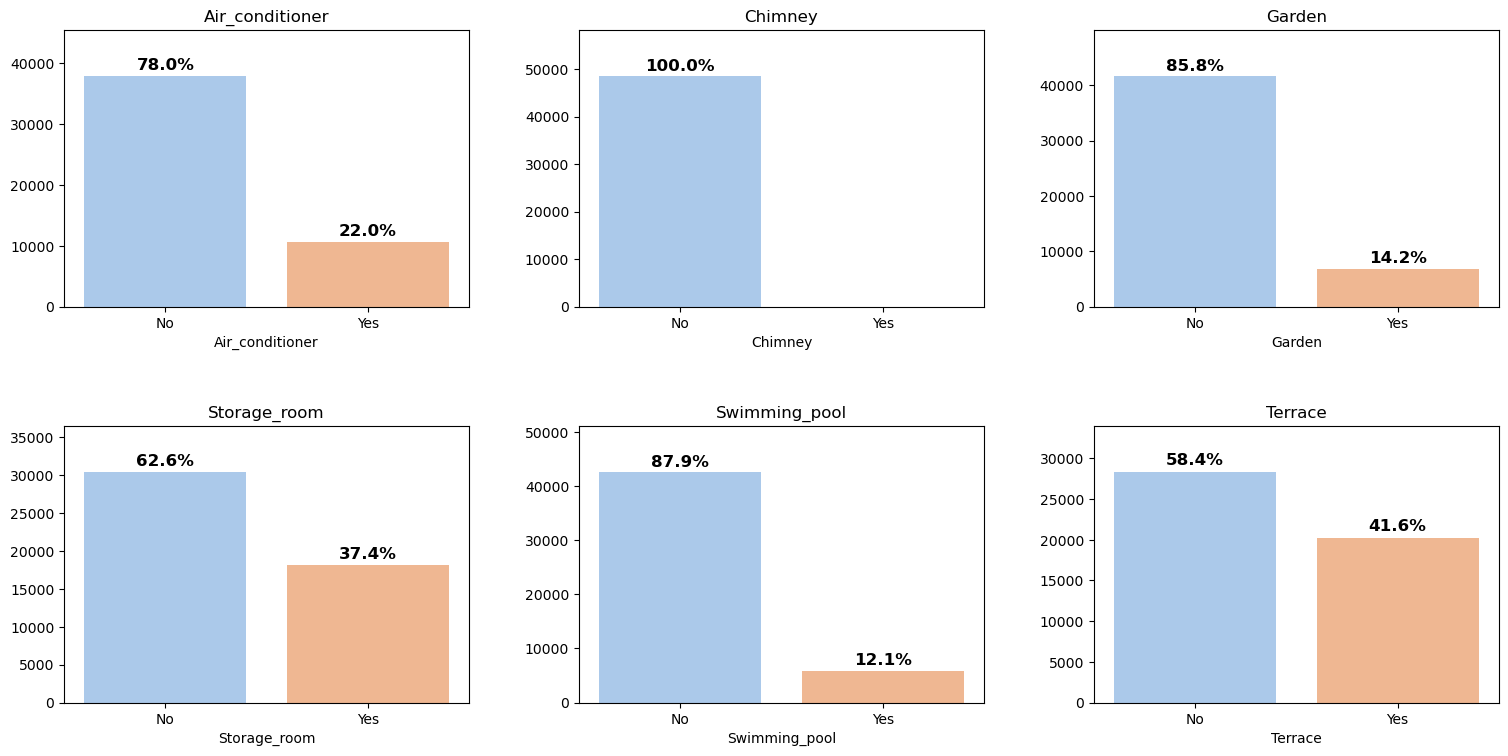

In [13]:
binary_categorical_view(apartments)

Certain features in apartments, such as air conditioning, gardens, and pools, are uncommon, while others, like fireplaces, are nonexistent. The most common feature is having a terrace, which is present in nearly half of the properties, and about one-third of the apartments include a storage room.

#### Distributions of Categorical Variables

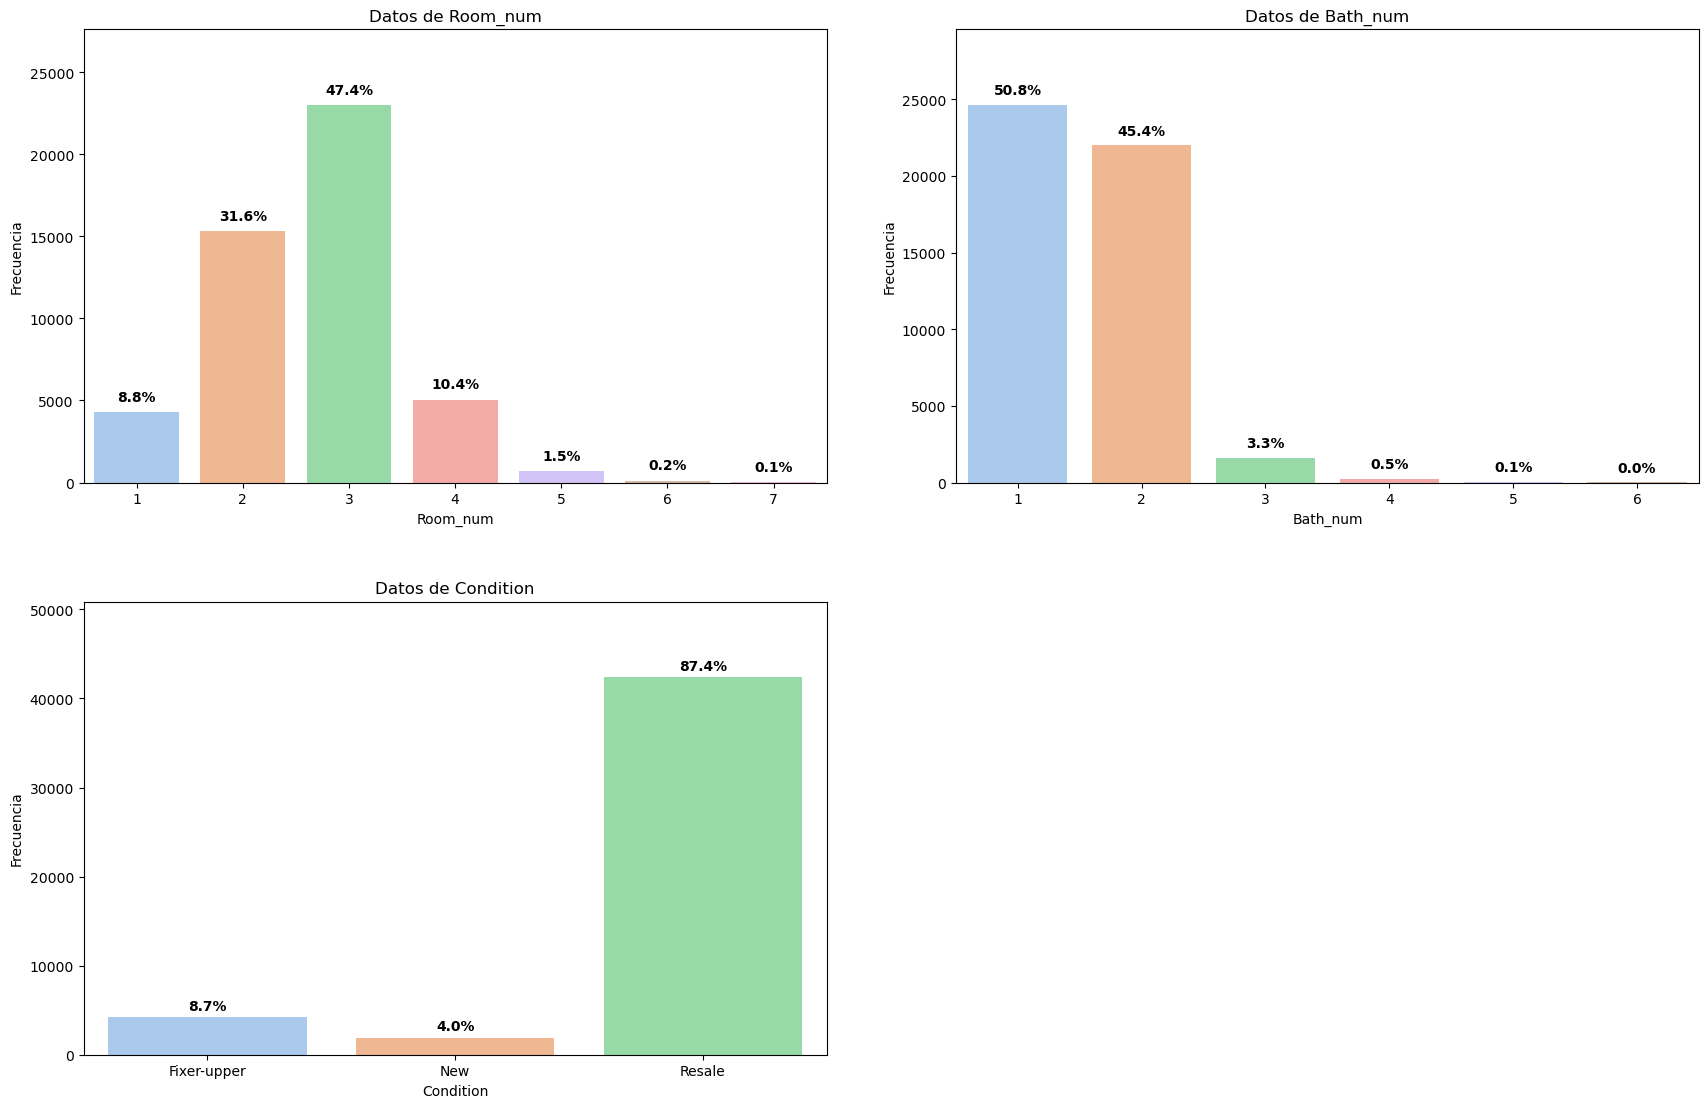

In [14]:
categorical_features_view(apartments)

- The room distribution chart shows that almost half of the apartments have 3 rooms, followed by 2-room apartments, which account for a third. Apartments with 5 or more rooms represent only 2%.
- In contrast, the bathroom distribution is concentrated in 1 bathroom, representing half of all records, followed by 2 bathrooms, which together account for 95.7% of the total.
- The vast majority of apartments are of the resale type.

#### Price Distribution

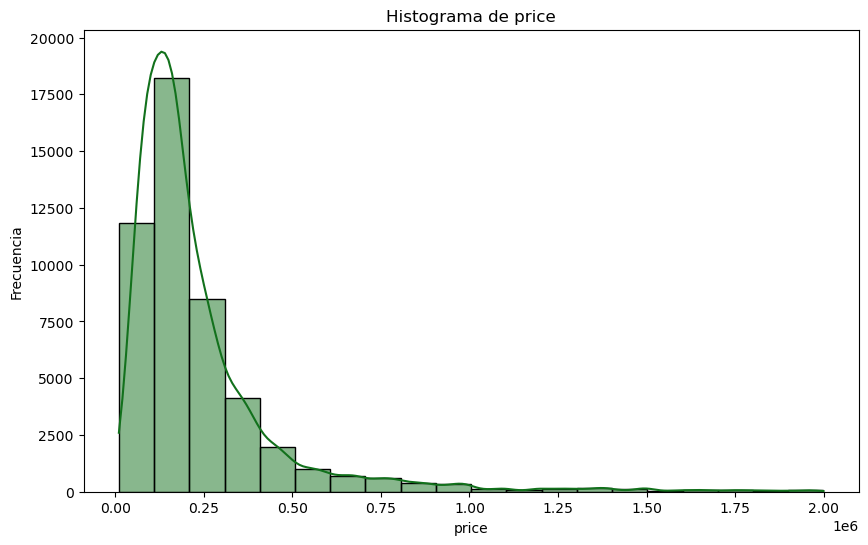

In [15]:
plot_histogram(apartments, 'price')

The price distribution shows a positive skew, with most properties concentrated in the range between 100,000 and 300,000 euros. The right tail reflects a small number of high-cost properties, reaching up to 2 million euros. This indicates that the market is dominated by affordable or mid-range properties, with a few luxury properties extending the overall price range.

#### Price Distribution by segment

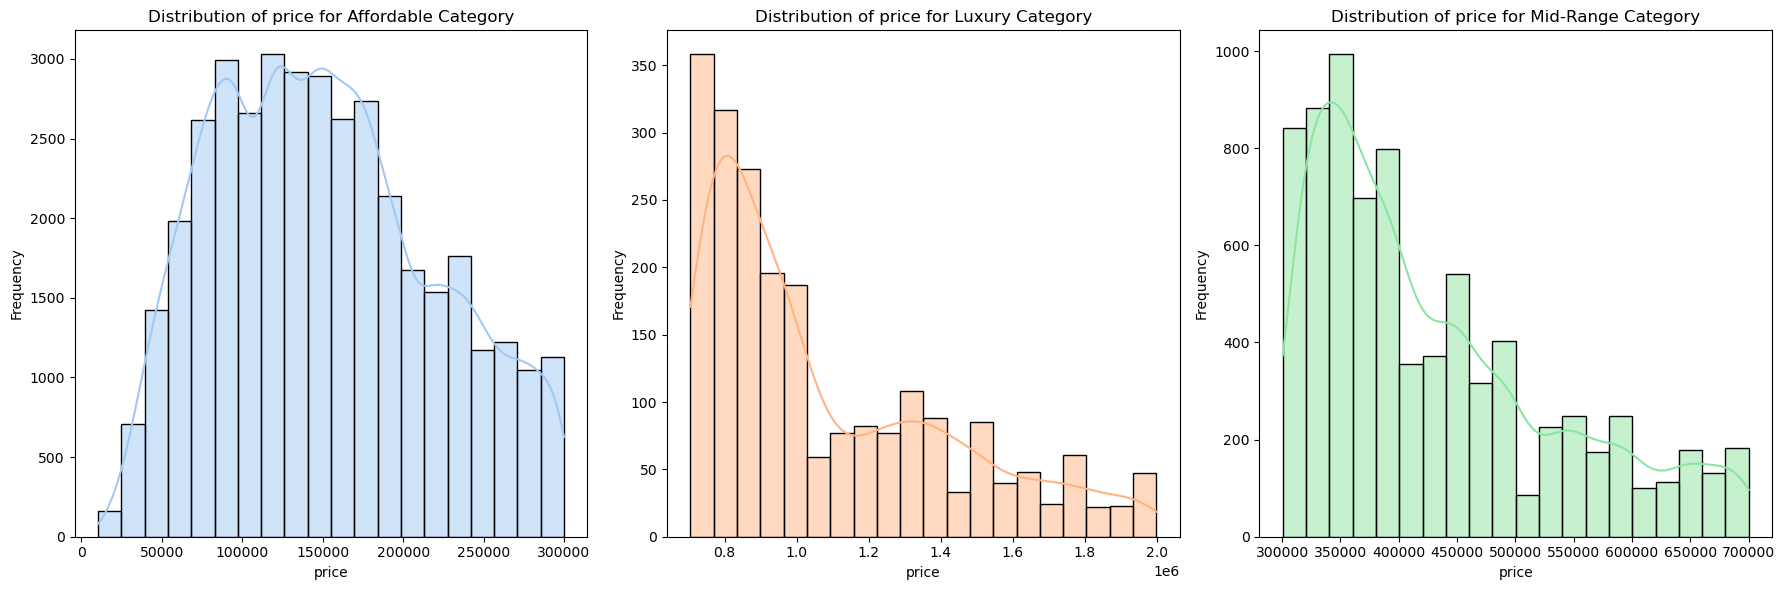

In [16]:
plot_category_histograms(apartments, 'price', 'price_segment')

The chart shows the price distribution for apartments across the three price segments:

- The Affordable category exhibits a relatively uniform distribution within its range, with prices concentrated between 100,000 and 200,000 euros.
- The Luxury category has most of its records concentrated at the lower end of the category, between 800,000 and 1.2 million euros, with few properties exceeding 1.5 million. Most luxury apartments are found in the initial range of this category.
- Apartments in the Mid-Range category are clustered around 350,000 euros, with a noticeable decline in frequency beyond 500,000 euros, indicating a bias toward the lower end of this segment.

Analyzing all three segments, we can conclude that properties in the Affordable segment are the most common, while luxury properties are relatively rare and concentrated in the lower range of their category.

#### Square Meters Distribution

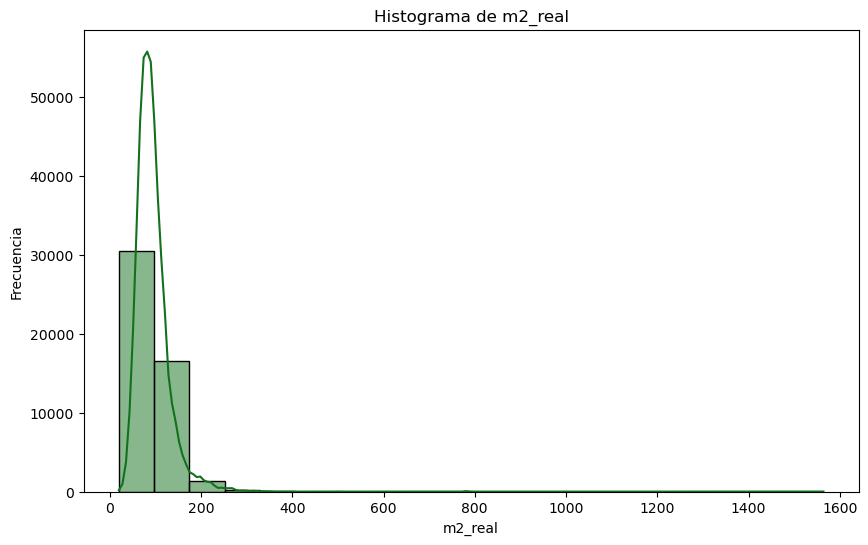

In [17]:
plot_histogram(apartments, 'm2_real')

The distribution of square meters shows a positive skew, with the majority of properties concentrated between 50 m² and 150 m². This indicates that most properties are in Small and Medium category. The Large category is less common.

#### Square Meters Distribution by Size Category

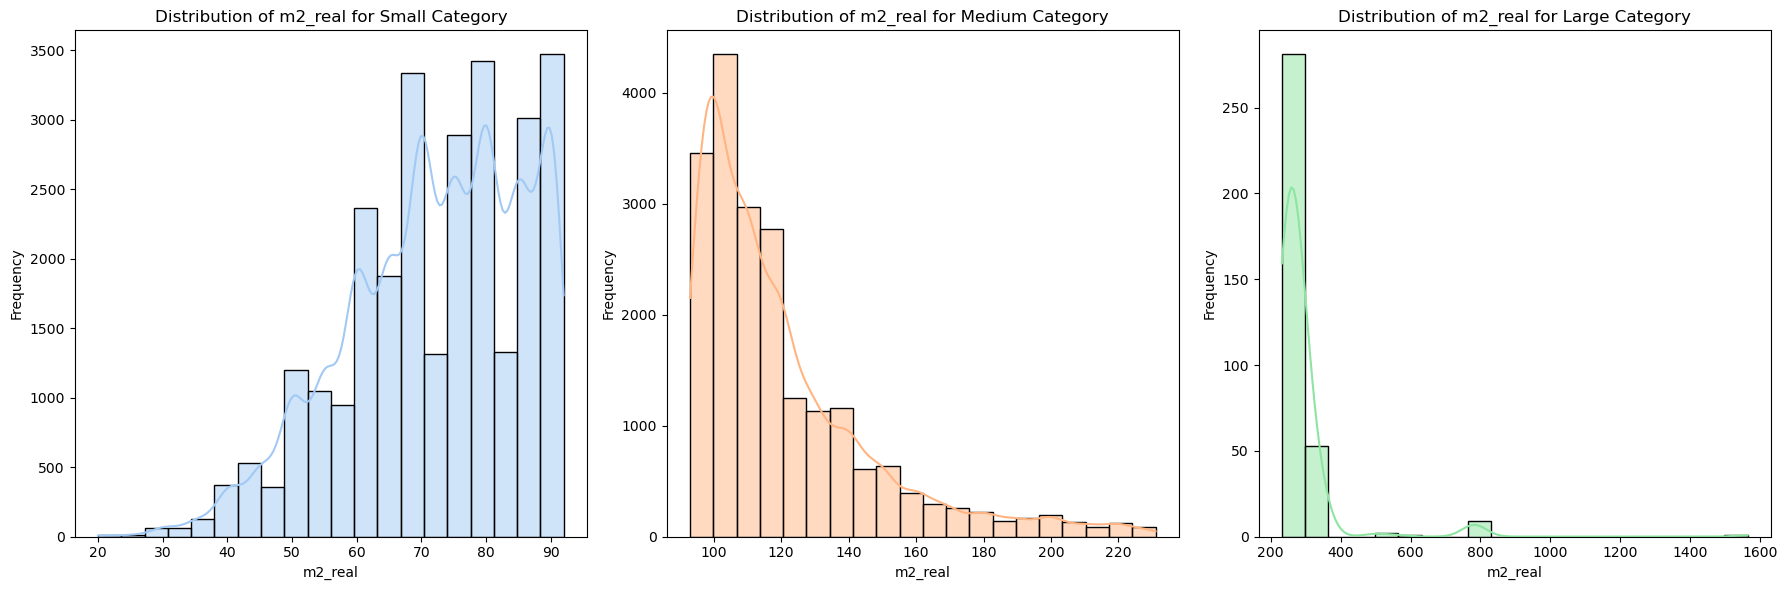

In [18]:
plot_category_histograms(apartments, 'm2_real', 'size_category')

#### Distribution by Region and Size Category

In [19]:
apartments.groupby(['region', 'size_category'], observed=False).size().unstack(fill_value=0)

size_category,Small,Medium,Large
region,,,
Andalucía,1234,819,11
Canarias,217,137,0
Castilla y León,1673,1539,4
Castilla-La Mancha,1127,1958,8
Cataluña,1809,426,3
Comunidad Valenciana,633,1132,1
Comunidad de Madrid,2577,1663,110
Galicia,3171,1512,0
Islas Baleares,3966,5620,183


#### Price Segment and Size Category Analysis

In [20]:
cross_table_apartments = pd.crosstab(apartments['price_segment'], apartments['size_category'], margins=True)
cross_table_apartments

size_category,Small,Medium,Large,All
price_segment,,,,
Affordable,25285,13136,0,38421
Mid-Range,2371,5506,13,7890
Luxury,94,1777,334,2205
All,27750,20419,347,48516


#### Correlation Heatmap

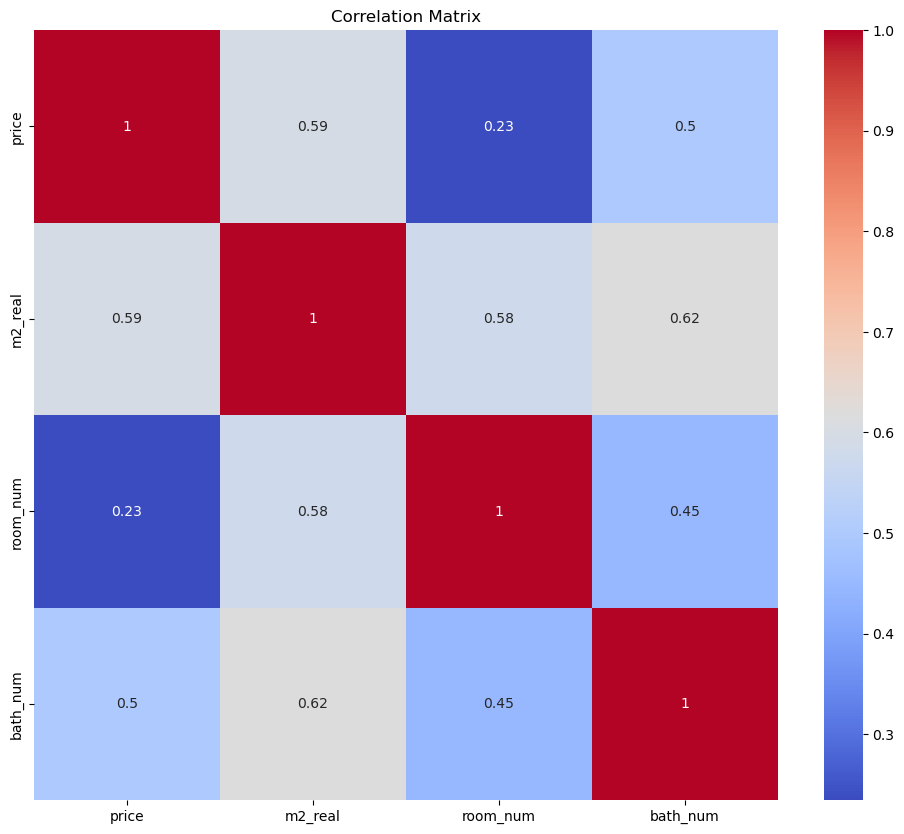

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(apartments[['price', 'm2_real', 'room_num', 'bath_num', ]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows that square footage is the variable most strongly related to apartment prices (0.6), followed by the number of bathrooms (0.48). Additionally, there is a moderate correlation between square footage and the number of rooms. The chart indicates that area is the most influential factor in pricing, followed by the number of rooms.

### Analysis by Price Segment

#### Filtering by price segment

In [22]:
affordable_apartments = apartments[apartments['price_segment'] == 'Affordable']
mid_range_apartments = apartments[apartments['price_segment'] == 'Mid-Range']
luxury_apartments = apartments[apartments['price_segment'] == 'Luxury']


### Affordable Apartments Analysis

#### Affordable Apartments Distribution by Region and Size Category

In [23]:
affordable_apartments.groupby(['region', 'size_category']).size().unstack(fill_value=0)

size_category,Small,Medium,Large
region,,,
Andalucía,1234,801,0
Canarias,217,134,0
Castilla y León,1673,1492,0
Castilla-La Mancha,1127,1903,0
Cataluña,1770,398,0
Comunidad Valenciana,633,1084,0
Comunidad de Madrid,2241,706,0
Galicia,3153,1414,0
Islas Baleares,3311,2388,0


#### Affordable Apartments Price Distribution by Region

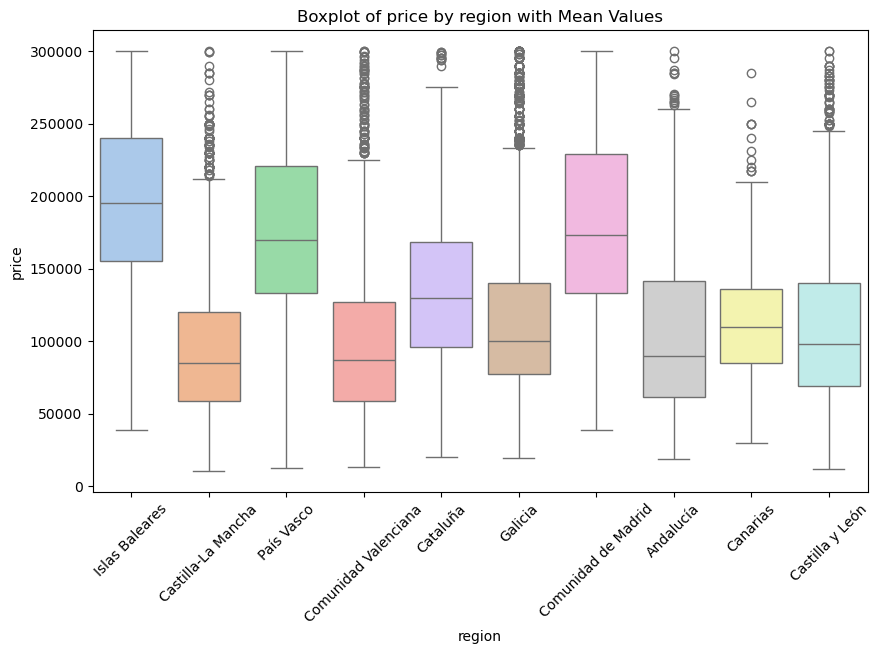

Summary Table of price by region sorted by Mean:
                 region      mean        Q1        Q3  std_dev
0        Islas Baleares 197767.25 155000.00 240000.00 56301.50
1   Comunidad de Madrid 180755.40 133350.00 229000.00 59592.77
2            País Vasco 176976.07 133000.00 220794.00 60137.55
3              Cataluña 133926.13  96000.00 168000.00 50869.32
4               Galicia 116780.80  77000.00 140000.00 55973.88
5              Canarias 114996.06  85000.00 136000.00 41459.24
6       Castilla y León 108825.89  69000.00 140000.00 53845.32
7             Andalucía 104710.97  61650.00 141650.00 54689.41
8  Comunidad Valenciana 100787.91  59000.00 126800.00 58180.42
9    Castilla-La Mancha  94720.85  58555.00 120000.00 50163.13


In [24]:
bivariate_distribution(affordable_apartments, 'region', 'price')


**Summary of Apartment Price Distribution by Region**

Regions with Higher Prices:
- **Comunidad de Madrid**: The IQR is wide, suggesting greater variability in prices.
- **Islas Baleares**: This region has less dispersion, but its median is similar to Madrid's, indicating a high-cost real estate market.
- **País Vasco**: The region holds the third position with a high median price and notable dispersion.

Regions with Lower Prices:
- **Castilla-La Mancha** and **Andalucía**: Both regions have the lowest median prices, representing the most affordable markets.


#### Affordable Apartments Square Meters Distribution by Region

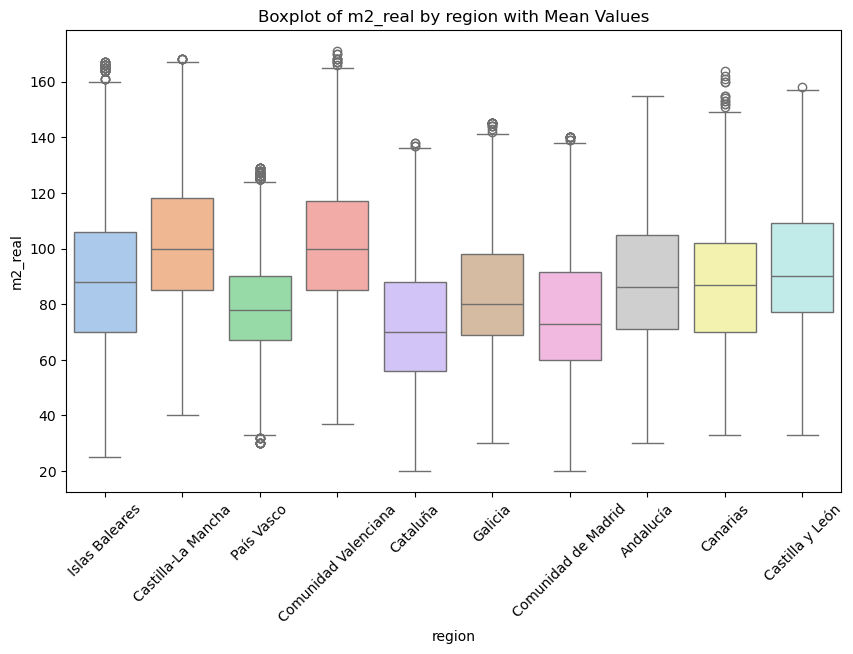

Summary Table of m2_real by region sorted by Mean:
                 region   mean    Q1     Q3  std_dev
0  Comunidad Valenciana 102.33 85.00 117.00    24.38
1    Castilla-La Mancha 101.91 85.00 118.00    24.36
2       Castilla y León  92.54 77.00 109.00    23.18
3        Islas Baleares  89.97 70.00 106.00    26.48
4             Andalucía  88.56 71.00 105.00    23.01
5              Canarias  88.03 70.00 102.00    26.34
6               Galicia  82.89 69.00  98.00    21.33
7            País Vasco  79.34 67.00  90.00    17.59
8   Comunidad de Madrid  76.21 60.00  91.50    22.67
9              Cataluña  72.14 56.00  88.00    22.05


In [25]:
bivariate_distribution(affordable_apartments, 'region', 'm2_real')

**Summary of the Square Meters (m²) Table by Region**

- **Castilla-La Mancha** and **Comunidad Valenciana** have the largest homes, with high Q1 and Q3 values, indicating consistency in the availability of larger properties.

- **Cataluña** and **Comunidad de Madrid** feature the smallest homes, with a narrow IQR, suggesting a more uniform supply of compact apartments.

#### Affordable Apartments Price per Square Meters

In [26]:
pricem2_affordable = calculate_price_per_m2(affordable_apartments, 'price', 'm2_real', 'region')
pricem2_affordable

,region,mean_price,mean_m2,price_m2_ratio
0,Castilla-La Mancha,94720.85,101.91,929.42
1,Comunidad Valenciana,100787.91,102.33,984.89
2,Castilla y León,108825.89,92.54,1176.04
3,Andalucía,104710.97,88.56,1182.38
4,Canarias,114996.06,88.03,1306.27
5,Galicia,116780.80,82.89,1408.87
6,Cataluña,133926.13,72.14,1856.49
7,Islas Baleares,197767.25,89.97,2198.26
8,País Vasco,176976.07,79.34,2230.47
9,Comunidad de Madrid,180755.40,76.21,2371.82


**Price per Square Meter Relationship:**

- **Castilla-La Mancha** and **Comunidad Valenciana** offer the best price-to-square-meter ratio, providing larger living spaces at lower costs.

- **Comunidad de Madrid** and **Cataluña** have high prices and smaller apartments, indicating a more competitive and expensive market with less space per euro invested.

- **Islas Baleares** and **País Vasco** despite having moderate average sizes, show very high prices due to the high demand for properties in these regions.

- **Andalucía** and **Galicia** provide moderate living spaces at low prices, representing an affordable option with reasonable size.

#### Affordable Apartments Bathrooms and Rooms Distribution

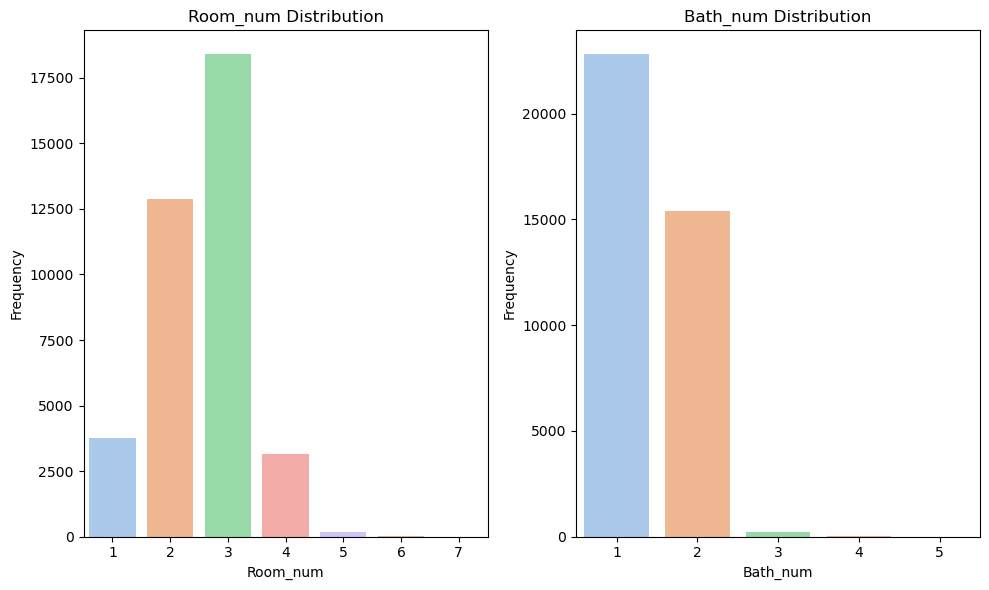

In [27]:
plot_rooms_bathrooms_distribution(affordable_apartments)

**Summary**

Affordable apartments tend to be compact, with most offering 3 rooms and 1 bathroom.

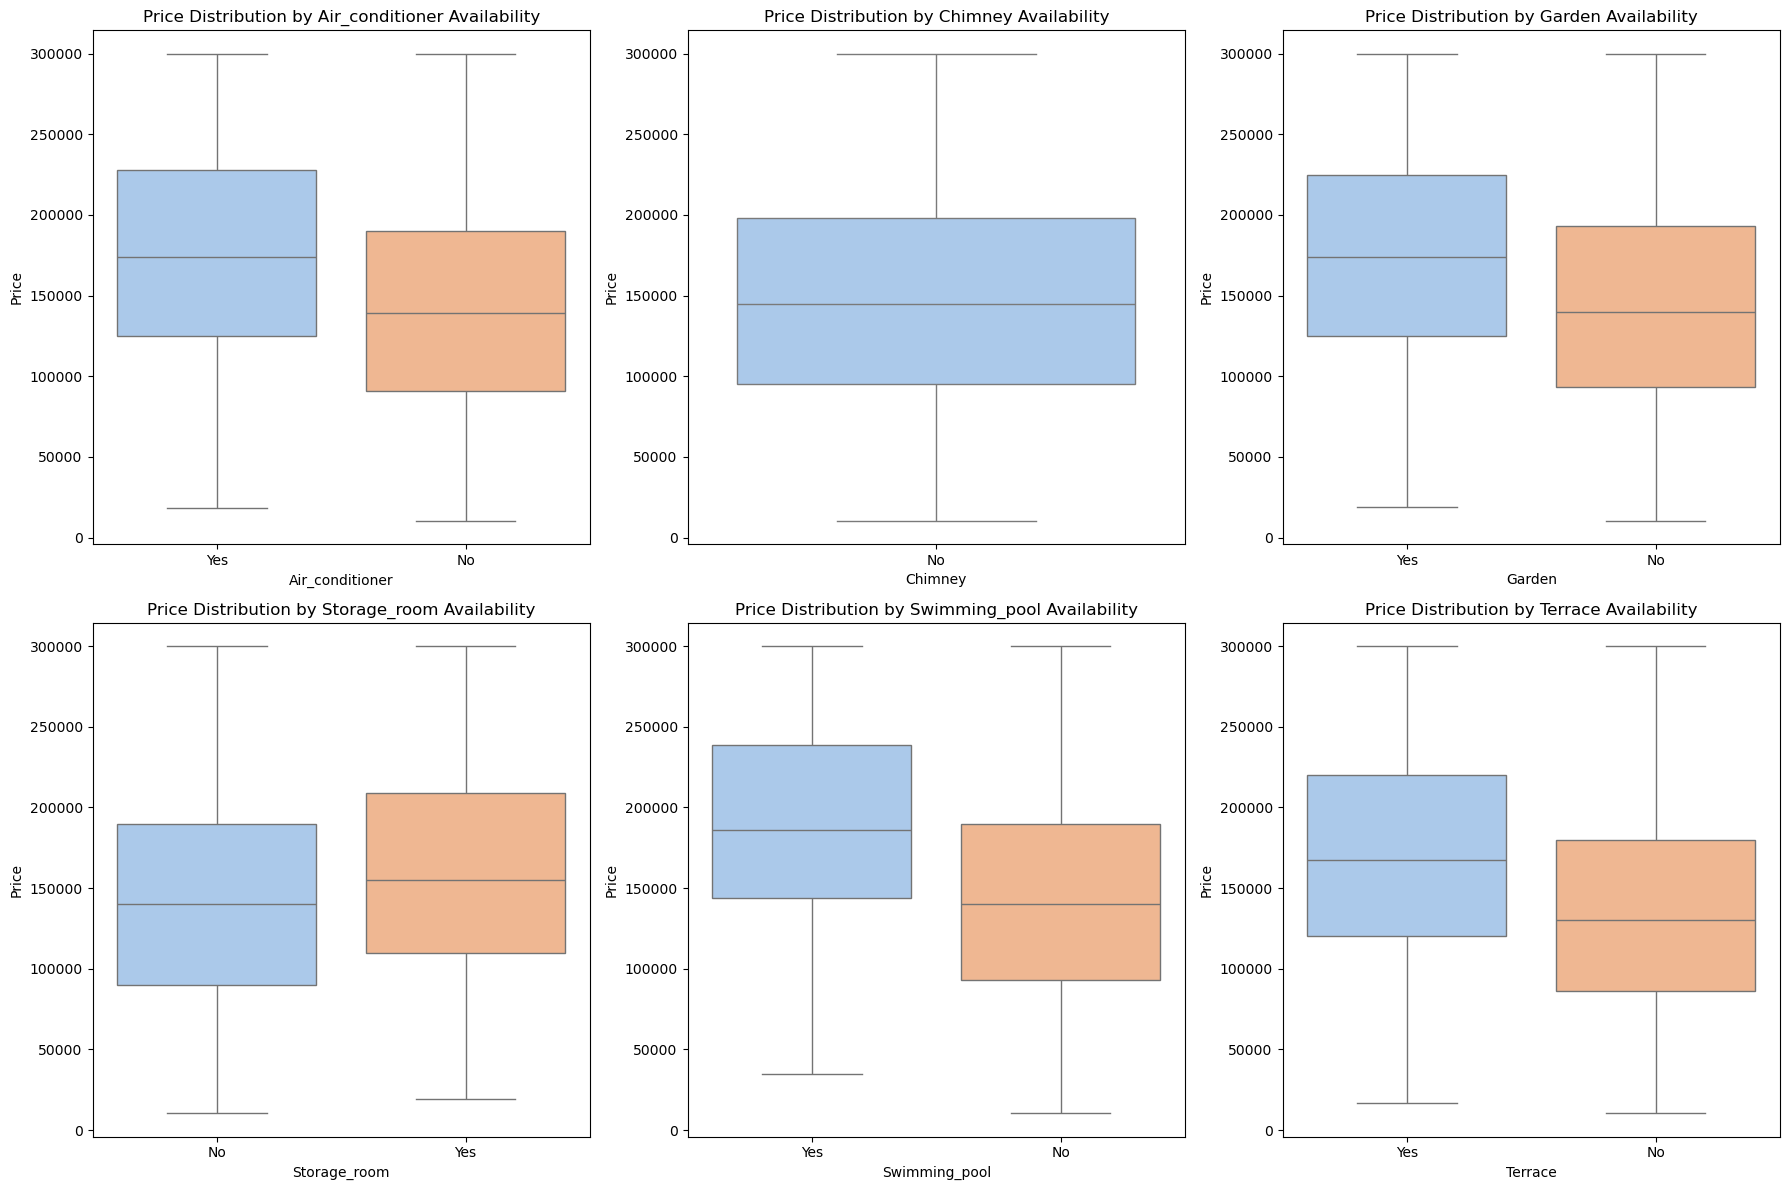


Summary Table of Mean Price by Binary Categorical Variables
     Air_conditioner   Chimney    Garden  Storage_room  Swimming_pool  \
Yes        174620.96      0.00 174348.97     160260.88      188105.26   
No         145650.36 150865.98 147637.31     145489.78      147123.07   

      Terrace  
Yes 169284.61  
No  139790.09  


In [28]:
plot_binary_categorical_relationships(affordable_apartments, 'price')

**Summary**
The most influential variables on the average price are swimming pool and air conditioning, followed by terrace and garden. Apartments with a chimney are not present in this segment.

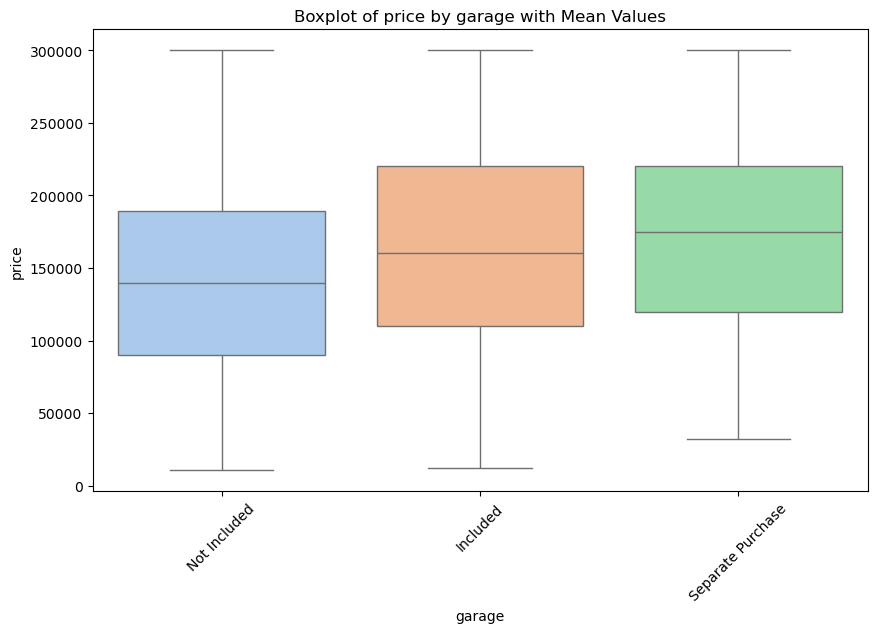

Summary Table of price by garage sorted by Mean:
              garage      mean        Q1        Q3  std_dev
0  Separate Purchase 173084.92 120000.00 220000.00 67949.34
1           Included 165821.96 110000.00 220000.00 66888.48
2       Not Included 144292.53  90000.00 189000.00 67426.22


In [29]:
bivariate_distribution(affordable_apartments, 'garage', 'price')


**Summary**

The presence of a garage, whether included or available for separate purchase, significantly increases the average price of apartments. Apartments with a garage available for separate purchase are the most expensive, possibly due to their location in high-demand areas.

#### Affordable Apartments Price Relationships with Condition variable.

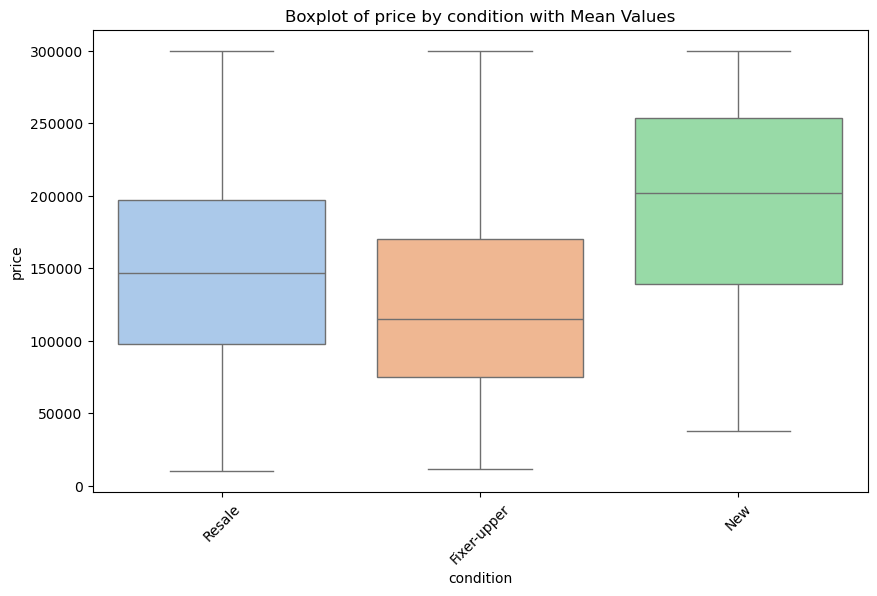

Summary Table of price by condition sorted by Mean:
     condition      mean        Q1        Q3  std_dev
0          New 189027.06 138993.00 253400.00 74558.24
1       Resale 151418.66  98000.00 197000.00 66859.84
2  Fixer-upper 126637.18  75000.00 170000.00 67750.13


In [30]:
bivariate_distribution(affordable_apartments, 'condition', 'price')

**Summary**

- New homes are the most expensive, with a higher price dispersion, indicating a diverse market in terms of quality and features. They are nearly 50% more expensive compared to fixer-upper homes.

- Resale homes have a significantly lower average price than new homes, with less variability, suggesting a more homogeneous supply in the market. They are 20% more expensive than fixer-upper homes.

#### Affordable Apartments Correlation Heatmap by size categories

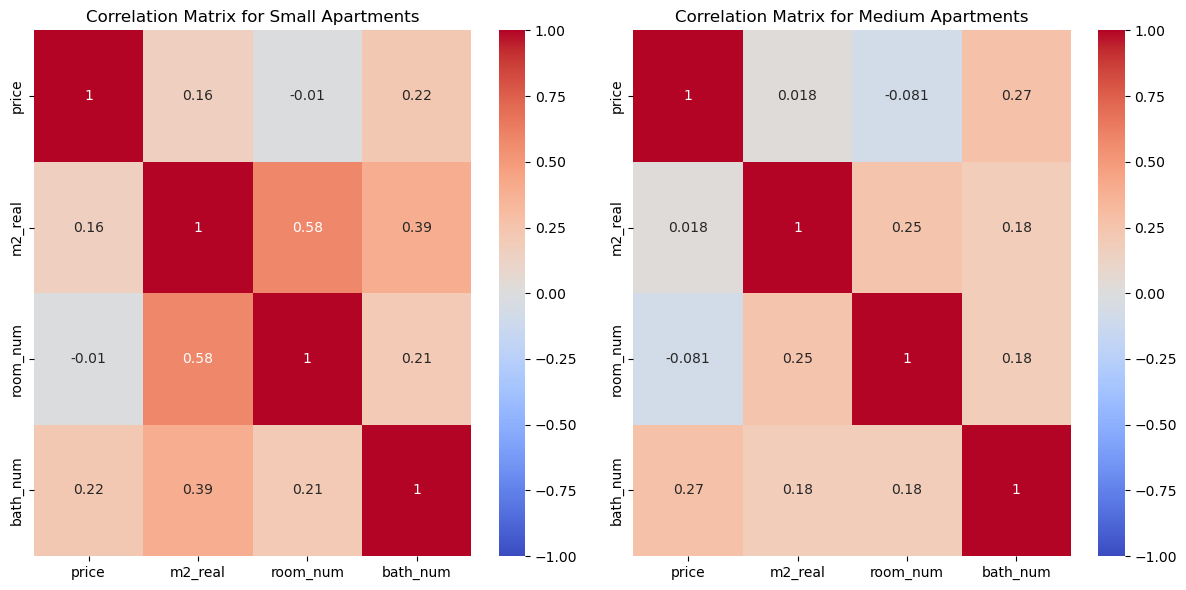

In [31]:
correlation_heatmap_by_size_category(affordable_apartments)

**Summary**

- **Small Apartments**: The highest correlation with the variable `price` is observed with `bath_num`, indicating that the number of bathrooms has a slight influence on the price. The variable `m2_real` shows a low correlation, suggesting that size is not a determining factor in small apartments.The relationship with `room_num` is practically nonexistent, indicating that the number of rooms does not significantly affect the price in this segment.

- **Medium Apartments**: In this segment, `bath_num` shows a stronger correlation with `price` (0.27), indicating that in medium-sized apartments, the number of bathrooms has a slightly greater influence on the price. On the other hand, size does not seem to be a key factor in this segment. The relationship between `room_num` and `price` is negative, which could indicate that price does not necessarily increase with more rooms in this segment.


#### Affordable Apartments Correlation

In [32]:
affordable_correlations = affordable_apartments.corr(method='pearson', numeric_only=True)
affordable_correlations

,air_conditioner,bath_num,chimney,garden,m2_real,price,room_num,storage_room,swimming_pool,terrace,latitude,longitude,p_code
air_conditioner,1.00,0.04,NaN,0.18,0.05,0.16,-0.08,-0.02,0.26,0.18,-0.33,0.26,-0.10
bath_num,0.04,1.00,NaN,0.06,0.55,0.28,0.38,0.19,0.07,0.10,-0.05,-0.08,-0.05
chimney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
garden,0.18,0.06,NaN,1.00,-0.01,0.13,-0.11,0.13,0.55,0.17,-0.04,0.03,-0.02
m2_real,0.05,0.55,NaN,-0.01,1.00,0.18,0.62,0.09,-0.02,0.12,-0.21,0.02,-0.04
price,0.16,0.28,NaN,0.13,0.18,1.00,0.04,0.10,0.17,0.21,0.16,0.29,-0.04
room_num,-0.08,0.38,NaN,-0.11,0.62,0.04,1.00,0.06,-0.17,0.03,-0.02,-0.06,0.07
storage_room,-0.02,0.19,NaN,0.13,0.09,0.10,0.06,1.00,0.06,0.09,0.15,-0.18,-0.02
swimming_pool,0.26,0.07,NaN,0.55,-0.02,0.17,-0.17,0.06,1.00,0.17,-0.15,0.13,-0.05
terrace,0.18,0.10,NaN,0.17,0.12,0.21,0.03,0.09,0.17,1.00,-0.08,0.14,-0.02


**Correlation Matrix Analysis**

**`price`:**
   - Shows a **weak positive correlation** with:
     - **`m2_real` (0.18):** Size in square meters has a slight influence on price.
     - **`bath_num` (0.28):** The number of bathrooms has a somewhat greater influence compared to other variables.
     - **`terrace` (0.21):** The presence of a terrace slightly contributes to an increase in price.
     - **`swimming_pool` (0.17):** A swimming pool is also positively related to price.

**`m2_real` (Actual square meters):**
   - Has a **strong positive correlation** with:
     - **`room_num` (0.62):** It is logical that larger apartments have more rooms.
     - **`bath_num` (0.55):** Larger apartments also tend to have more bathrooms.
   - **Weak negative correlation** with **`latitude` (-0.21):** Larger properties tend to be located in regions with lower latitude.

**`air_conditioner`:**
   - Shows positive correlation with:
     - **`swimming_pool` (0.26):** Apartments with air conditioning often have a swimming pool.
     - **`terrace` (0.18):** A terrace is also associated with the presence of air conditioning.
     - **`price` (0.16):** Air conditioning has a slight impact on price.

**`swimming_pool` (Pool):**
   - Has a **strong correlation** with:
     - **`garden` (0.55):** Properties with gardens also tend to have swimming pools.
   - **Weak positive correlation** with **`price` (0.17):** A pool has a slight impact on price.

**`latitude` and `longitude`:**
   - **`latitude` (-0.33) and `longitude` (0.26)** with **`air_conditioner`:**
     - Air conditioning is more common in lower latitudes and in locations with greater longitude.
   - **`longitude` (0.29)** with **`price`:** Regions with greater longitude tend to have slightly higher prices.


In [33]:
mid_range_apartments.groupby(['region', 'size_category']).size().unstack(fill_value=0)

size_category,Small,Medium,Large
region,,,
Andalucía,0,18,2
Canarias,0,3,0
Castilla y León,0,47,3
Castilla-La Mancha,0,55,8
Cataluña,39,25,0
Comunidad Valenciana,0,47,0
Comunidad de Madrid,313,561,0
Galicia,18,96,0
Islas Baleares,620,2408,0


The `Mid-Range` segment only features apartments in the Small and Medium categories. Only the regions **Islas Baleares**, **País Vasco**, and **Comunidad de Madrid** have sufficient records for analysis.

#### Filter the Segment by Removing Regions with Low Record Counts.

In [34]:
mid_range_apartments = mid_range_apartments[mid_range_apartments['region'].isin(['Islas Baleares', 'País Vasco', 'Comunidad de Madrid'])]

#### Mid-Range Apartments Price Distribution by Región

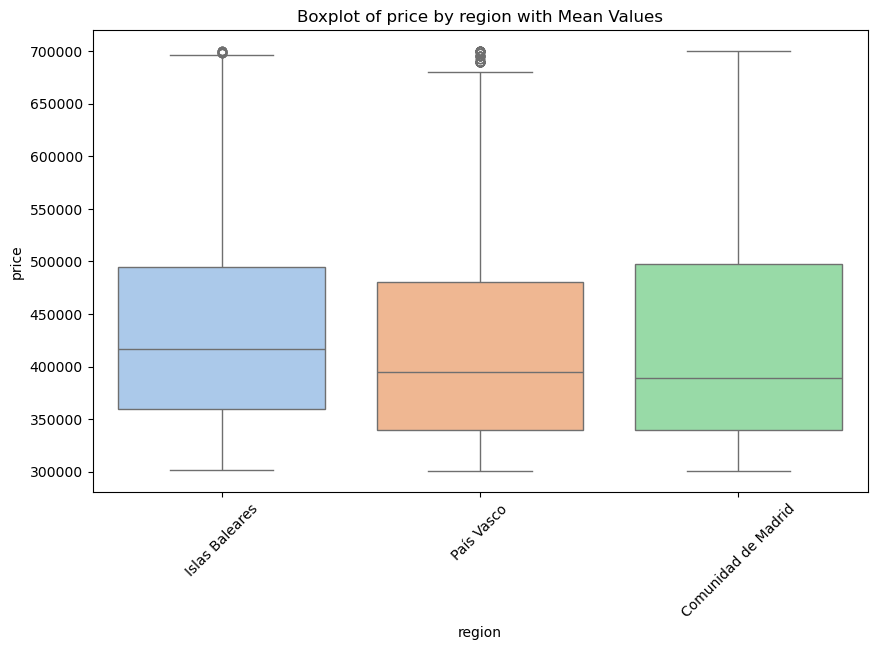

Summary Table of price by region sorted by Mean:
                region      mean        Q1        Q3   std_dev
0       Islas Baleares 442985.38 360000.00 495000.00 103887.16
1  Comunidad de Madrid 429354.44 340000.00 498000.00 111627.41
2           País Vasco 425263.28 340016.00 480000.00 103663.88


In [35]:
bivariate_distribution(mid_range_apartments, 'region', 'price')

The three regions have similar average prices, ranging from 425,000 to 443,000 euros. However, the Community of Madrid stands out for its greater price dispersion.

#### Mid-Range Apartments Square Meters Distribution by Region

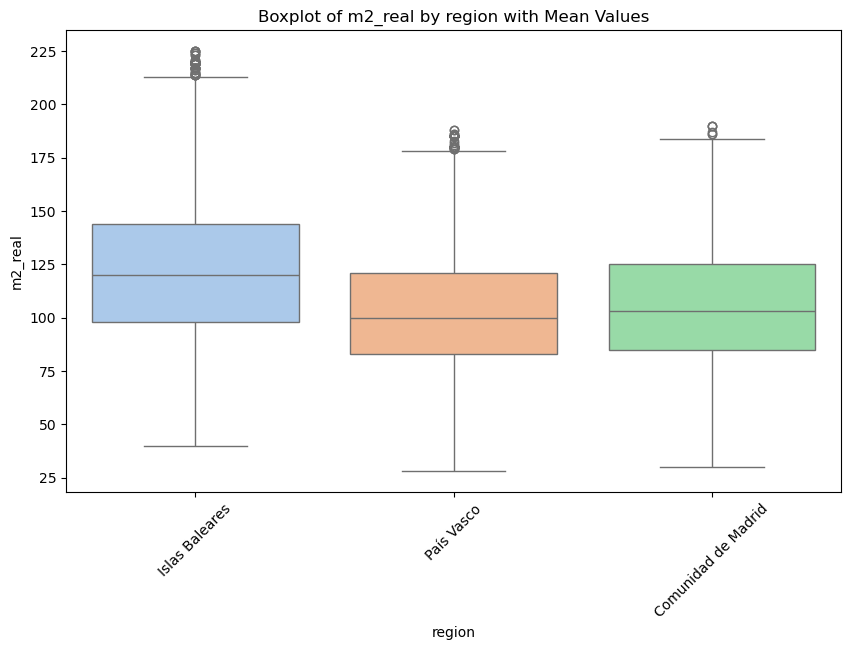

Summary Table of m2_real by region sorted by Mean:
                region   mean    Q1     Q3  std_dev
0       Islas Baleares 123.26 98.00 144.00    36.30
1  Comunidad de Madrid 106.02 85.00 125.00    30.63
2           País Vasco 104.06 83.00 121.00    29.57


In [36]:
bivariate_distribution(mid_range_apartments, 'region', 'm2_real')

**Summary**

The region of **Islas Baleares** has the largest average surface area and a wide interquartile range. The other regions have approximately the same average with a narrower IQR.

In [37]:
pricem2_mid_range = calculate_price_per_m2(mid_range_apartments, 'price', 'm2_real', 'region')
print(pricem2_mid_range)

                region  mean_price  mean_m2  price_m2_ratio
0       Islas Baleares   442985.38   123.26         3593.77
1  Comunidad de Madrid   429354.44   106.02         4049.81
2           País Vasco   425263.28   104.06         4086.75


**Summary**

- Although the **Islas Baleares** region has the highest average price, its price-per-square-meter ratio is the lowest among the three regions. This indicates that while properties are more expensive overall, they offer more space for the price compared to the other regions.

- **Comunidad de Madrid** reflects a competitive market where apartments tend to be more compact, and the price-per-square-meter is higher compared to **Islas Baleares**.

- **País Vasco** has the lowest average price but the highest price-per-square-meter ratio. This suggests that properties are more expensive per square meter, despite having a lower average price.


#### Mid-Range Apartments Bathrooms and Rooms Distribution

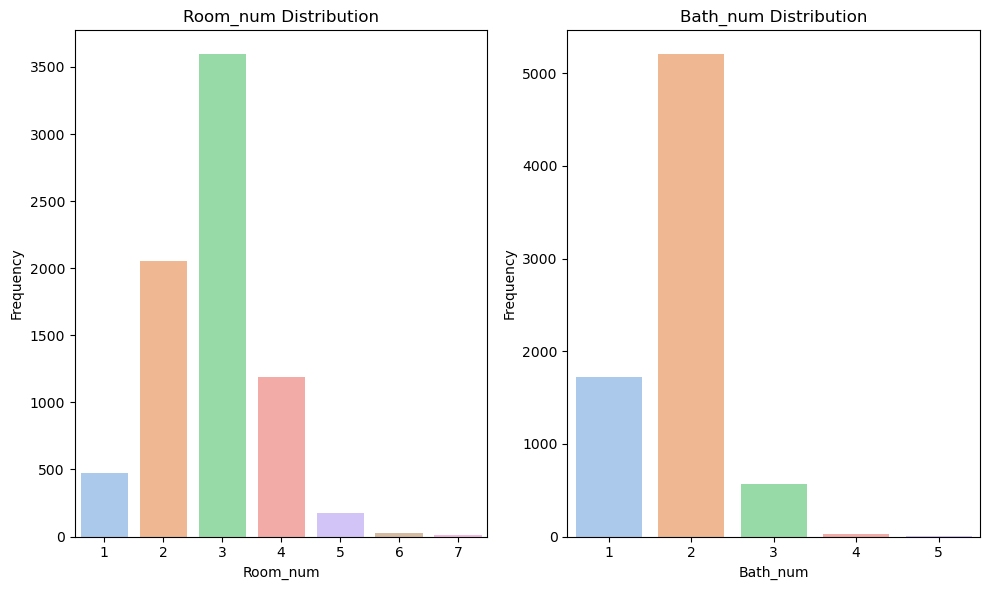

In [38]:
plot_rooms_bathrooms_distribution(mid_range_apartments)

**Summary**

Apartments in this segment tend to be more spacious, with 3-bedroom and 2-bathroom units being the most common, catering to families or buyers seeking greater comfort compared to more affordable segments.

#### Mid-Range Apartments Price Relationships with Binary Categorical Variables

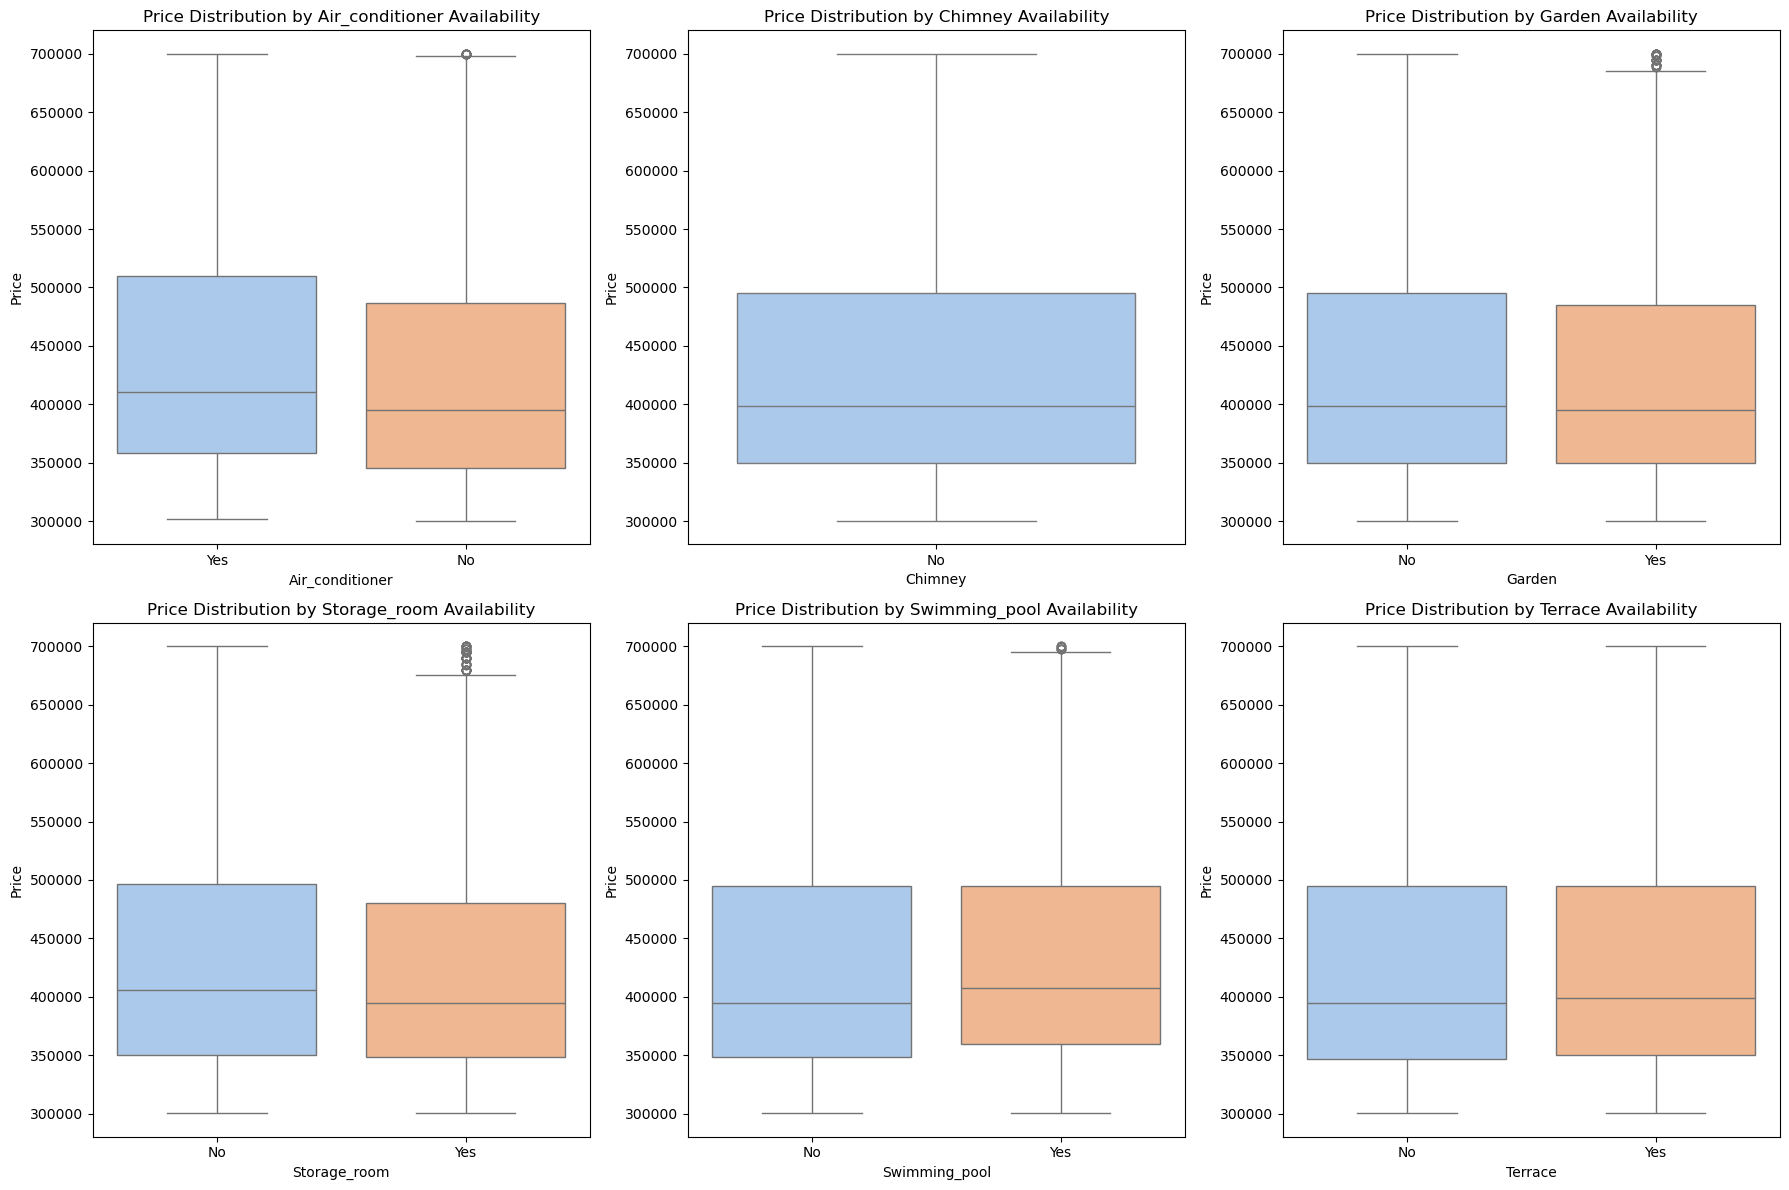


Summary Table of Mean Price by Binary Categorical Variables
     Air_conditioner   Chimney    Garden  Storage_room  Swimming_pool  \
Yes        444402.15      0.00 430285.40     425864.95      438189.41   
No         426981.70 432865.64 433611.88     437712.16      431217.30   

      Terrace  
Yes 435414.51  
No  429370.29  


In [39]:
plot_binary_categorical_relationships(mid_range_apartments, 'price')

**Summary**

Features such as air conditioning and terraces have a moderate impact on the average price. The presence of a garden, storage room, or swimming pool does not significantly increase the price, which could be due to a homogeneous supply in this segment. Apartments in this segment do not have chimneys.

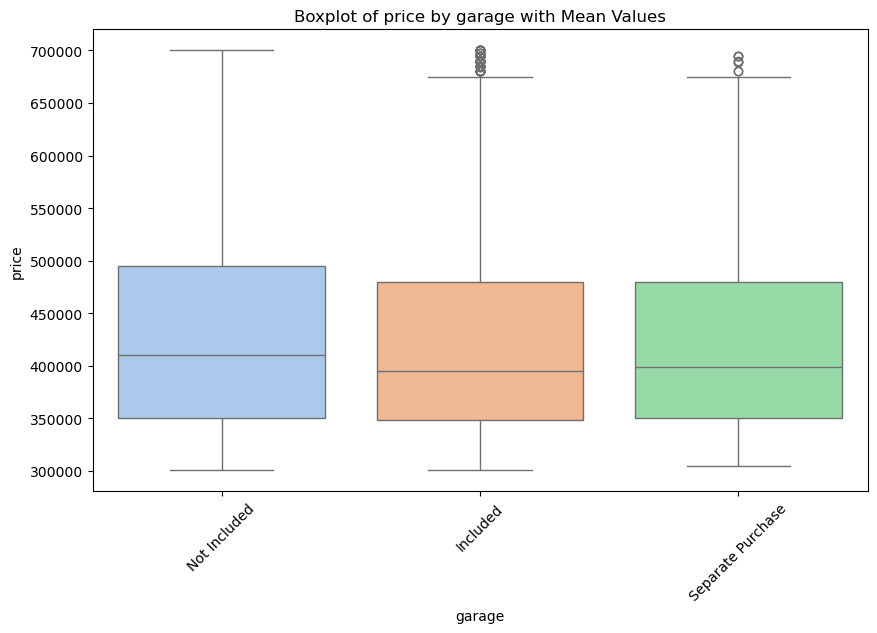

Summary Table of price by garage sorted by Mean:
              garage      mean        Q1        Q3   std_dev
0       Not Included 437527.67 350000.00 495000.00 106902.66
1  Separate Purchase 433758.17 350000.00 480000.00 109374.38
2           Included 426014.85 348250.00 480000.00 101584.13


In [40]:
bivariate_distribution(mid_range_apartments, 'garage', 'price')

**Summary**

Apartments without a garage tend to be more expensive, which could be related to premium locations where the lack of a garage does not decrease their value. On the other hand, apartments with an included garage have a lower average price and less dispersion, suggesting a more homogeneous market offering.

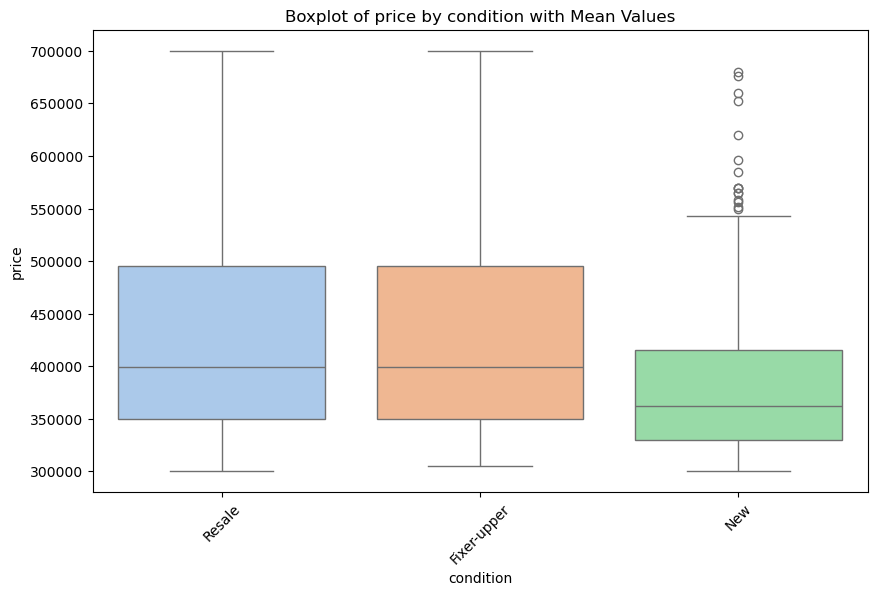

Summary Table of price by condition sorted by Mean:
     condition      mean        Q1        Q3   std_dev
0       Resale 435482.12 350000.00 495000.00 105590.09
1  Fixer-upper 434844.03 350000.00 495000.00 108108.79
2          New 384196.36 329375.00 415000.00  73519.65


In [41]:
bivariate_distribution(mid_range_apartments, 'condition', 'price')

**Summary**

`Resale` and `fixer-upper` properties have similar average prices but show greater dispersion. New properties, on the other hand, are more affordable on average and have a more consistent and less variable offering.

#### Mid-Range Apartments Correlation Heatmap by Size Categories

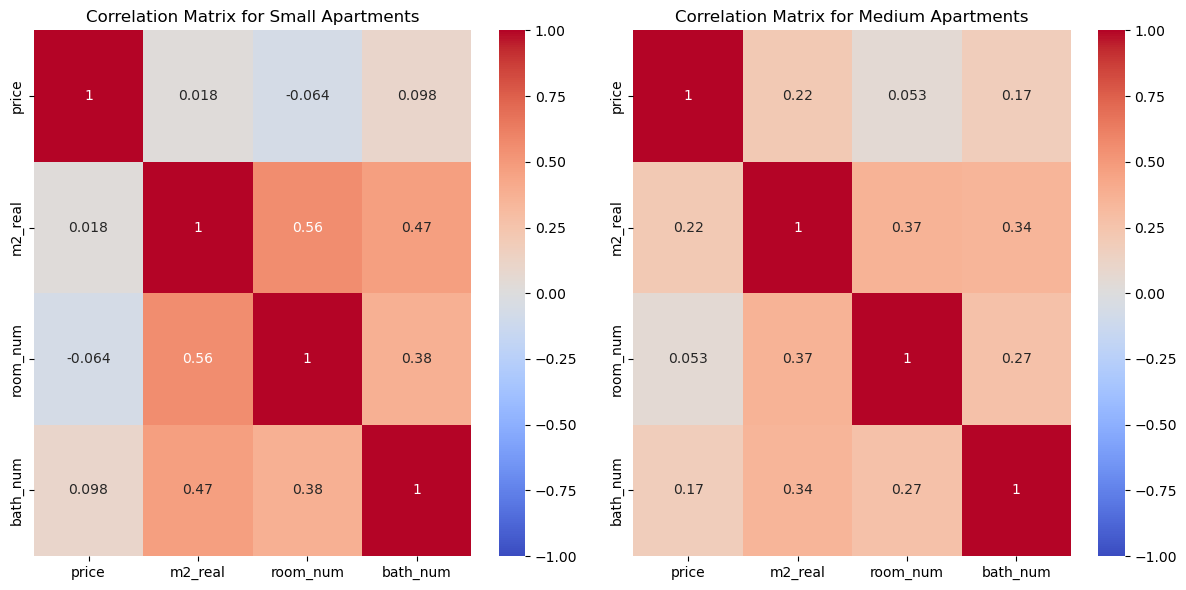

In [42]:
correlation_heatmap_by_size_category(mid_range_apartments)

**Summary**

In small and medium apartments, the number of bathrooms has a moderate influence on the price, although it remains relatively low. On the other hand, in large apartments, the number of bathrooms becomes a key factor driving the price, while the size and the number of rooms lose relevance and even show negative correlations.

#### Mid-Range Apartments Correlation

In [43]:
mid_range_apartments_correlations = mid_range_apartments.corr(method='pearson', numeric_only=True)
mid_range_apartments_correlations

,air_conditioner,bath_num,chimney,garden,m2_real,price,room_num,storage_room,swimming_pool,terrace,latitude,longitude,p_code
air_conditioner,1.00,0.05,NaN,0.25,0.13,0.08,-0.15,0.08,0.38,0.13,-0.64,0.46,-0.32
bath_num,0.05,1.00,NaN,0.13,0.55,0.19,0.47,0.15,0.15,0.17,-0.04,0.06,-0.02
chimney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
garden,0.25,0.13,NaN,1.00,0.13,-0.01,-0.02,0.22,0.54,0.22,-0.17,0.11,-0.08
m2_real,0.13,0.55,NaN,0.13,1.00,0.22,0.59,0.17,0.15,0.16,-0.25,0.25,-0.08
price,0.08,0.19,NaN,-0.01,0.22,1.00,0.09,-0.06,0.03,0.03,-0.07,0.09,-0.08
room_num,-0.15,0.47,NaN,-0.02,0.59,0.09,1.00,0.13,-0.09,0.05,0.10,-0.07,0.09
storage_room,0.08,0.15,NaN,0.22,0.17,-0.06,0.13,1.00,0.16,0.18,0.03,-0.05,0.09
swimming_pool,0.38,0.15,NaN,0.54,0.15,0.03,-0.09,0.16,1.00,0.21,-0.37,0.29,-0.23
terrace,0.13,0.17,NaN,0.22,0.16,0.03,0.05,0.18,0.21,1.00,-0.10,0.15,-0.14


**Correlation Matrix Analysis for Mid-Range Apartments**

**`price` (Price):**
- The correlation with **other variables is weak**, suggesting that no factor has a strong influence on price:
   - **`m2_real` (0.19):** The size in square meters shows a slight positive correlation, indicating that size has minimal impact on price.
   - **`bath_num` (0.18):** The number of bathrooms also shows a slight positive relationship.
   - **`air_conditioner` (0.08):** The presence of air conditioning has a marginal relationship with price.
   - **`swimming_pool` (0.03) and `terrace` (0.03):** Both features show very weak correlations, indicating their impact is nearly insignificant.

**`m2_real` (Actual Square Meters):**
- **High positive correlation** with:
   - **`room_num` (0.60):** As the square meter size increases, the number of rooms also increases.
   - **`bath_num` (0.56):** Larger properties tend to have more bathrooms.
- **Weak negative correlation** with **`latitude` (-0.27):** Larger properties are concentrated in regions with lower latitudes.

**`air_conditioner` (Air Conditioning):**
- Shows **moderate positive correlations** with:
   - **`swimming_pool` (0.37):** Properties with air conditioning often include a swimming pool.
   - **`garden` (0.25):** There is a moderate relationship with the presence of a garden.

**`swimming_pool` (Swimming Pool):**
- **High positive correlation** with:
   - **`garden` (0.55):** Properties with gardens also tend to have swimming pools, suggesting a profile of higher-end properties.
- **Weak positive correlation** with **`m2_real` (0.13):** Swimming pools are slightly more common in larger properties.
- **Negative correlation with `latitude` (-0.36):** Swimming pools are more frequent in lower latitudes (warmer regions).

**`room_num` (Number of Rooms):**
- **High positive correlation** with **`m2_real` (0.60):** Property size is directly linked to the number of rooms.
- **Moderate positive correlation** with **`bath_num` (0.48):** Properties with more rooms generally have more bathrooms.

**`latitude` and `longitude`:**
- **`latitude` (-0.62)** and **`longitude` (0.44)** with **`air_conditioner`:**
   - Air conditioning is more common in regions with lower latitudes (southern areas) and higher longitudes (eastern areas).
- **`longitude` (0.10)** with **`price`:** Regions with higher longitudes show a slight increase in average price.


### Luxury Apartments Analysis

In [44]:
luxury_apartments.describe().T

,count,mean,std,min,25%,50%,75%,max
air_conditioner,2205.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
bath_num,2205.00,2.50,0.77,1.00,2.00,2.00,3.00,6.00
chimney,2205.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
garden,2205.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
m2_real,2205.00,178.56,74.22,58.00,134.00,170.00,210.00,1564.00
price,2205.00,1076160.72,337849.82,705000.00,798000.00,950000.00,1300000.00,1999000.00
room_num,2205.00,3.48,1.09,1.00,3.00,3.00,4.00,7.00
storage_room,2205.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
swimming_pool,2205.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
terrace,2205.00,0.56,0.50,0.00,0.00,1.00,1.00,1.00


#### Luxury Apartments Distribution by Region and Size Category

In [45]:
luxury_apartments.groupby(['region', 'size_category']).size().unstack(fill_value=0)

size_category,Small,Medium,Large
region,,,
Andalucía,0,0,9
Castilla y León,0,0,1
Cataluña,0,3,3
Comunidad Valenciana,0,1,1
Comunidad de Madrid,23,396,110
Galicia,0,2,0
Islas Baleares,35,824,183
País Vasco,36,551,27


The `luxury` segment only features apartments in the regions **Islas Baleares**, **País Vasco**, and **Comunidad de Madrid**, which have sufficient records for analysis.

#### Filter the segment by removing regions with low record counts.

In [46]:
luxury_apartments = luxury_apartments[luxury_apartments['region'].isin(['Islas Baleares', 'País Vasco', 'Comunidad de Madrid'])]

#### Luxury Apartments Price Distribution by Región

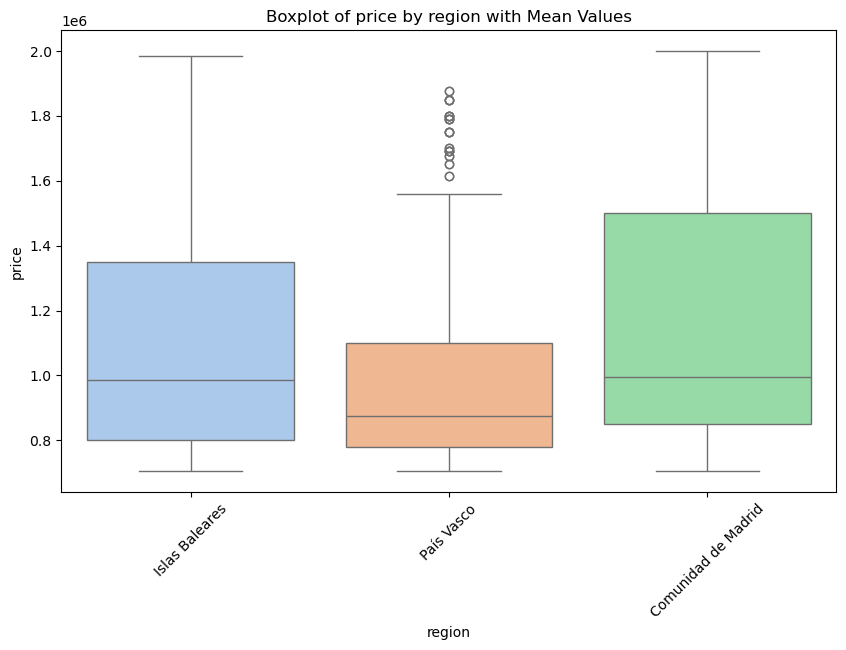

Summary Table of price by region sorted by Mean:
                region       mean        Q1         Q3   std_dev
0  Comunidad de Madrid 1175556.14 849000.00 1500000.00 397362.30
1       Islas Baleares 1086420.53 800000.00 1350000.00 324510.06
2           País Vasco  977126.87 780000.00 1100000.00 272920.80


In [47]:
bivariate_distribution(luxury_apartments, 'region', 'price', show_outliers=True)

**Summary**

- The **Comunidad de Madrid** leads this segment with the highest average price but also shows the greatest dispersion, reflecting a more varied market and possibly properties of very high value.
- **Islas Baleares** maintains high prices with lower dispersion, indicating a more uniform offering.
- **País Vasco** has the most affordable average price and shows a more stable market with lower variability.


#### Luxury Apartments Square Meters Distribution by Region

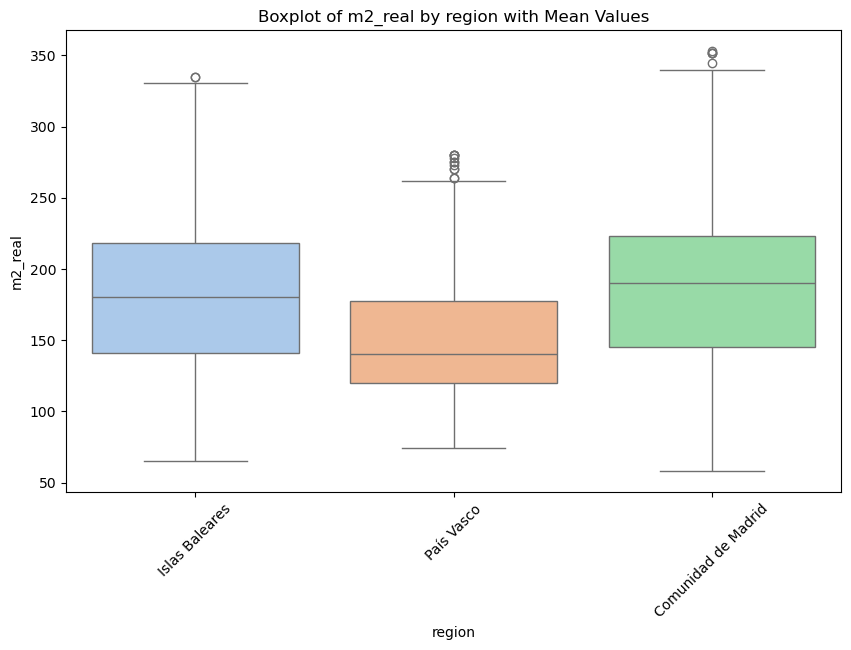

Summary Table of m2_real by region sorted by Mean:
                region   mean     Q1     Q3  std_dev
0  Comunidad de Madrid 189.31 145.00 223.00    59.20
1       Islas Baleares 182.35 141.00 218.00    53.51
2           País Vasco 150.09 120.00 177.25    43.39


In [48]:
bivariate_distribution(luxury_apartments, 'region', 'm2_real')

**Summary**

- **Islas Baleares** has a higher average surface area, with a wide interquartile range (IQR) indicating greater variability in apartment sizes. The outliers at the upper end represent properties with exceptional surface areas.

- **Comunidad de Madrid** shows a wide IQR and considerable dispersion, with high outliers suggesting properties with large surface areas.

- The **País Vasco** region has the lowest average surface area and a more reduced IQR. Most apartments in this region are concentrated between 100 and 150 m², with non-extreme outliers.


#### Luxury Apartments Bathrooms and Rooms Distribution

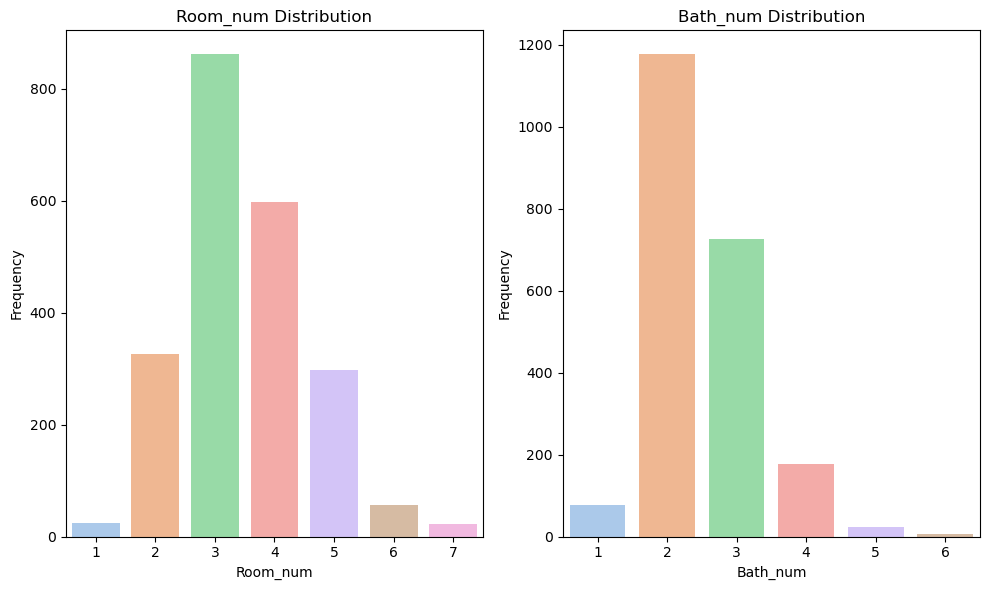

In [49]:
plot_rooms_bathrooms_distribution(luxury_apartments)

**Summary**

The apartments in this segment are primarily designed for families or buyers seeking additional comfort, with 3-4 rooms and 2-3 bathrooms as the predominant configuration. Options with fewer rooms or bathrooms are less common.


#### Luxury Apartments Price Relationships with Binary Categorical Variables

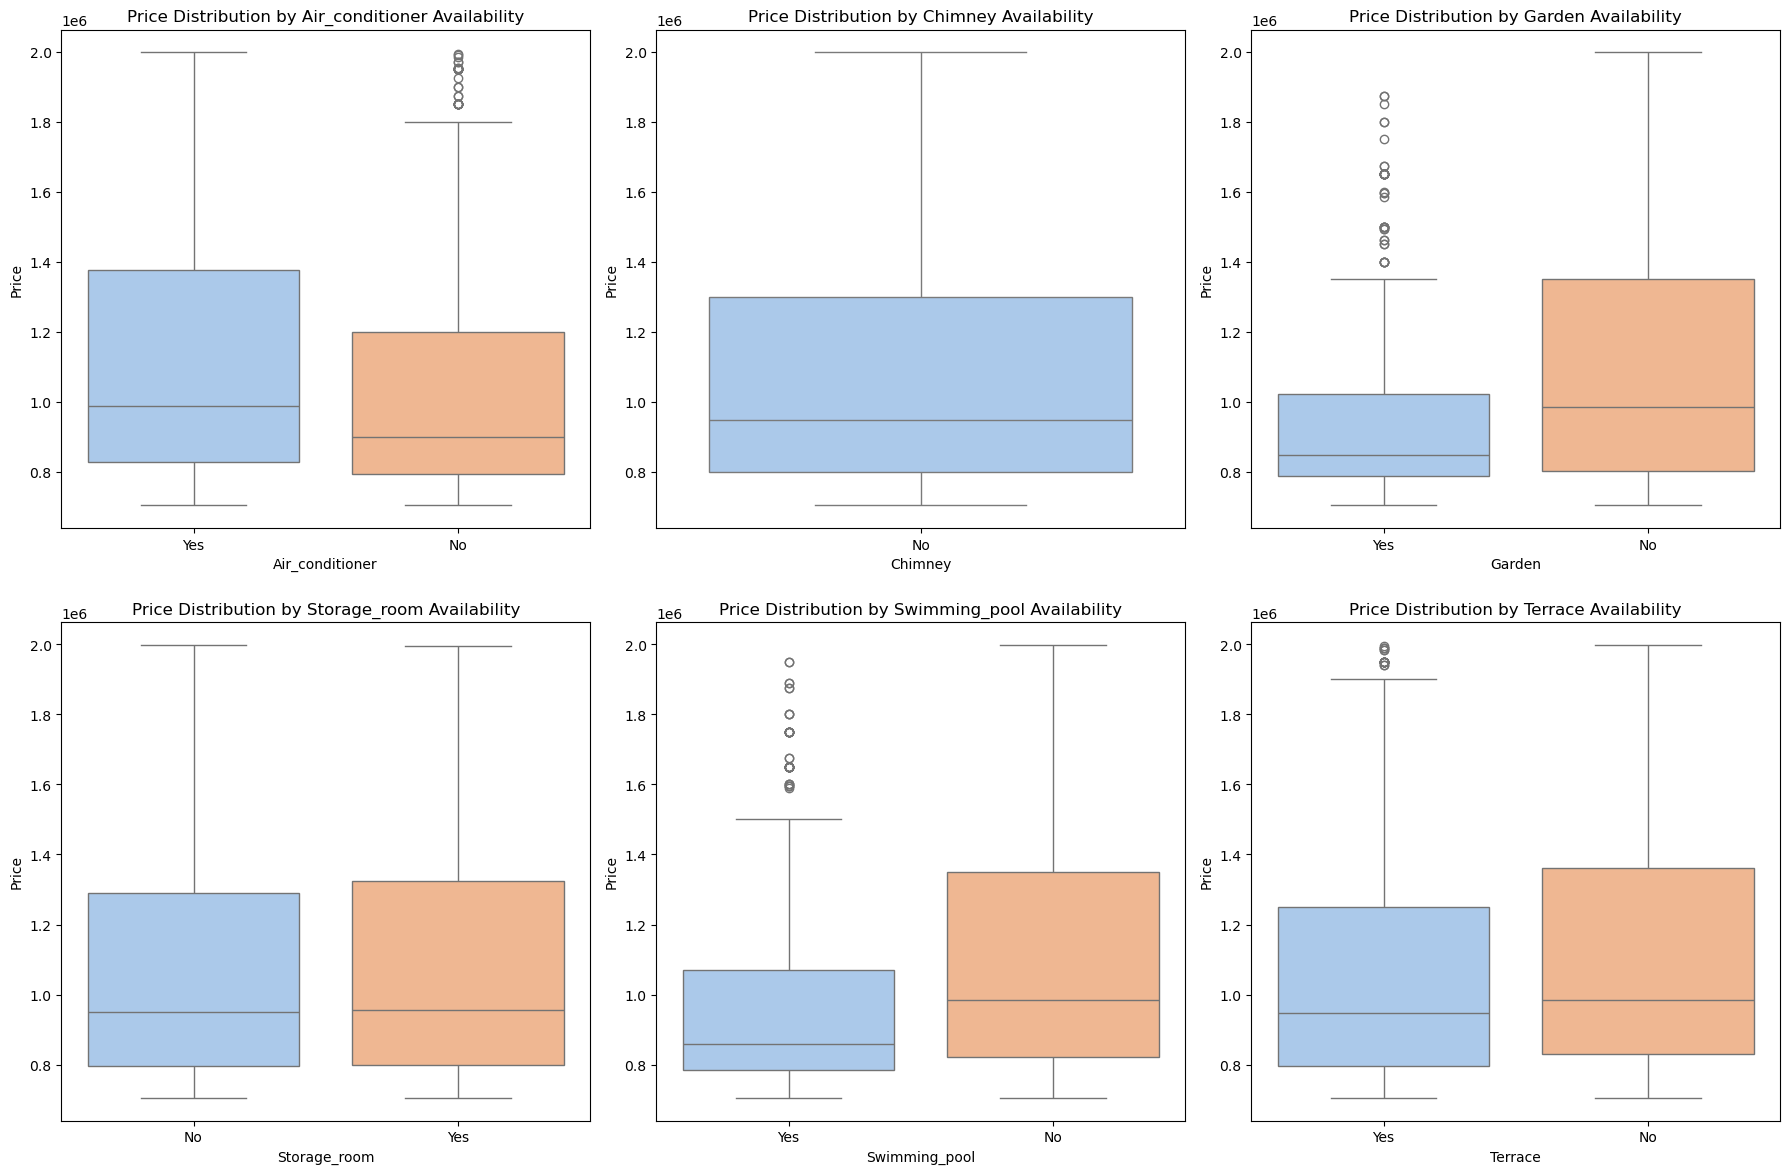


Summary Table of Mean Price by Binary Categorical Variables
     Air_conditioner    Chimney     Garden  Storage_room  Swimming_pool  \
Yes       1126979.07       0.00  960495.62    1084196.74      987079.09   
No        1027278.45 1077288.46 1107326.67    1072522.66     1104474.85   

       Terrace  
Yes 1053937.29  
No  1106919.96  


In [50]:
plot_binary_categorical_relationships(luxury_apartments, 'price')

**Summary**

In this segment, features such as air conditioning and storage rooms have a moderate and positive impact on the average price. However, features like swimming pools, gardens, and terraces, which would be expected to increase the price, show the opposite behavior, suggesting that their presence may be associated with less expensive properties or non-premium areas.

#### Luxury Apartments Price Relationships with Garage Variable

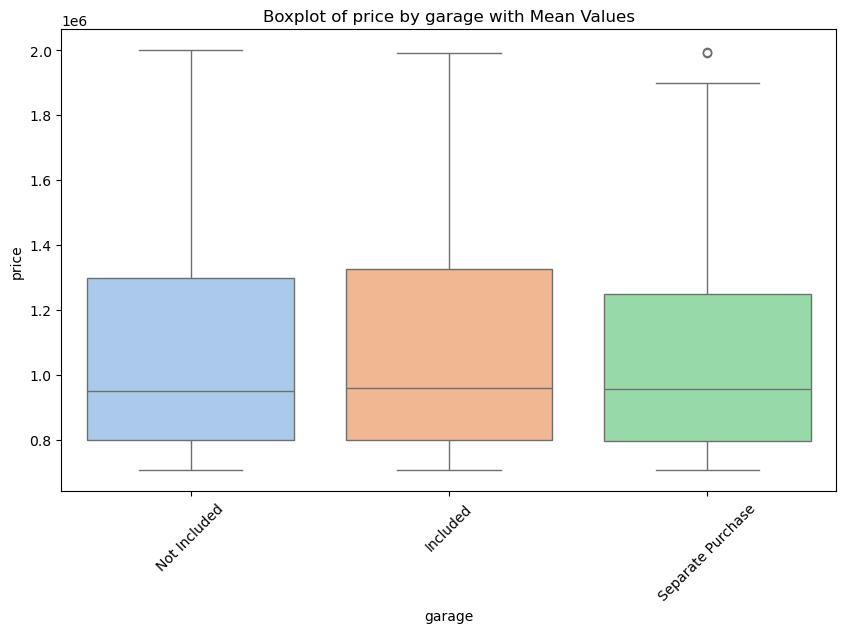

Summary Table of price by garage sorted by Mean:
              garage       mean        Q1         Q3   std_dev
0           Included 1083036.96 800000.00 1325000.00 334848.26
1       Not Included 1073208.32 798000.00 1299000.00 339110.83
2  Separate Purchase 1071671.43 795000.00 1250000.00 373074.01


In [51]:
bivariate_distribution(luxury_apartments, 'garage', 'price')

**Summary**

There is no significant difference in the median prices among the garage categories, suggesting that the inclusion of a garage does not drastically affect the price.

#### Luxury Apartments Price Relationships with Condition Variable

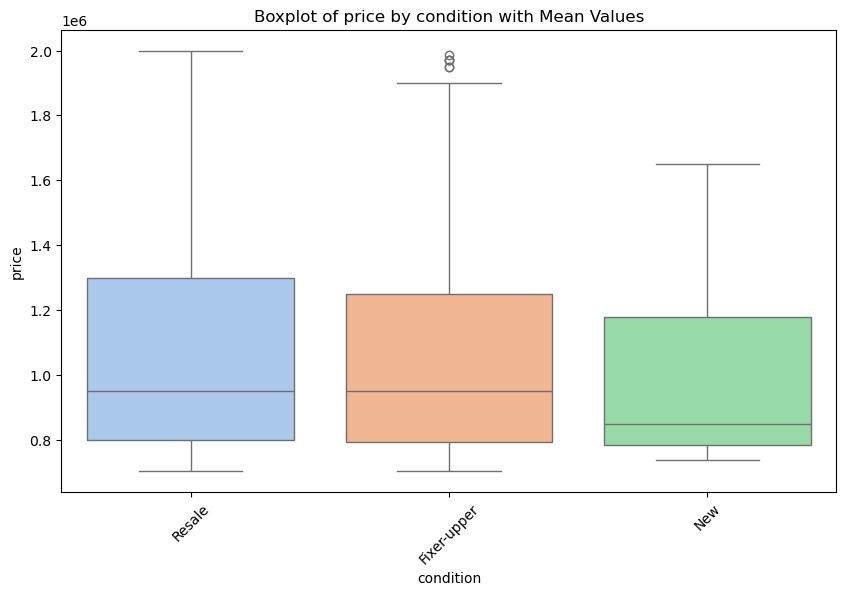

Summary Table of price by condition sorted by Mean:
     condition       mean        Q1         Q3   std_dev
0       Resale 1081454.03 800000.00 1300000.00 340945.92
1  Fixer-upper 1060816.57 795000.00 1250000.00 326376.18
2          New  997722.22 785000.00 1179750.00 312805.48


In [52]:
bivariate_distribution(luxury_apartments, 'condition', 'price')

**Summary**



#### Luxury Apartment Correlation by Size Categories Head Map

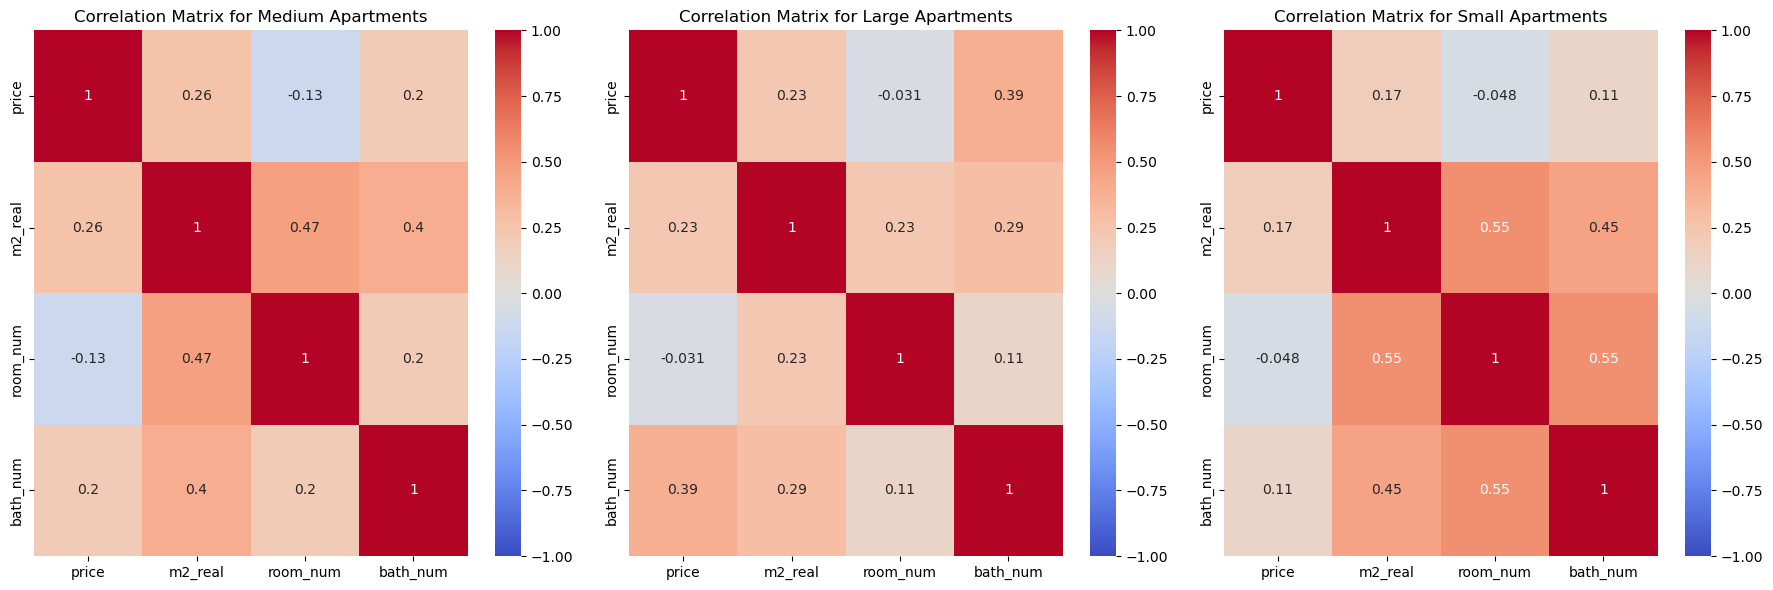

In [53]:
correlation_heatmap_by_size_category(luxury_apartments)

**Summary**

**Small Apartments**
- The size in square meters shows the most significant correlation with other variables, especially with `room_num` and `bath_num`. However, the influence of these variables on price is weak, suggesting that price is less determined by the physical characteristics of the property in this segment.

**Medium Apartments**
- The size in square meters is the factor most correlated with price, although the relationship is weak.
- The number of bathrooms has a slight influence on price, while the number of rooms shows a negative relationship, suggesting that a higher number of rooms does not necessarily increase the price.
- Larger properties in this segment tend to have more bathrooms and rooms, but these factors do not strongly impact the price.

**Large Apartments**
- In large apartments, the number of bathrooms has the greatest influence on price, indicating that the number of bathrooms is a determining factor.
- The size in square meters also influences the price, although to a lesser extent.
- The number of rooms does not show a positive relationship with price, suggesting that luxury features (such as more bathrooms) are more relevant than the number of rooms in large apartments.

#### Luxury apartments correlations

In [55]:
luxury_apartments_correlations = luxury_apartments.corr(method='pearson', numeric_only=True)
luxury_apartments_correlations

,air_conditioner,bath_num,chimney,garden,m2_real,price,room_num,storage_room,swimming_pool,terrace,latitude,longitude,p_code
air_conditioner,1.00,0.05,NaN,0.14,0.11,0.15,-0.18,0.05,0.18,0.08,-0.55,0.24,-0.16
bath_num,0.05,1.00,NaN,0.04,0.56,0.32,0.34,0.08,0.01,0.02,-0.12,-0.05,0.08
chimney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
garden,0.14,0.04,NaN,1.00,-0.01,-0.18,-0.05,0.21,0.69,0.29,-0.18,0.23,-0.22
m2_real,0.11,0.56,NaN,-0.01,1.00,0.37,0.57,0.09,-0.00,0.00,-0.27,0.07,0.08
price,0.15,0.32,NaN,-0.18,0.37,1.00,0.02,0.02,-0.15,-0.08,-0.16,-0.02,0.09
room_num,-0.18,0.34,NaN,-0.05,0.57,0.02,1.00,0.08,-0.08,-0.01,0.10,-0.09,0.14
storage_room,0.05,0.08,NaN,0.21,0.09,0.02,0.08,1.00,0.18,0.14,-0.02,-0.04,0.07
swimming_pool,0.18,0.01,NaN,0.69,-0.00,-0.15,-0.08,0.18,1.00,0.34,-0.26,0.39,-0.33
terrace,0.08,0.02,NaN,0.29,0.00,-0.08,-0.01,0.14,0.34,1.00,-0.03,0.20,-0.17


**Correlation Matrix Analysis for Luxury Apartments**

**`price`:**
- The correlation with **other variables is moderate**, suggesting that certain factors have a stronger influence on price:
   - **`m2_real` (0.37):** The size in square meters shows the **strongest positive correlation**, indicating that larger properties tend to have higher prices.
   - **`bath_num` (0.32):** The number of bathrooms has a moderate impact on price.
   - **`air_conditioner` (0.15):** The presence of air conditioning has a slight positive effect on price.
   - **`garden` (-0.18) and `swimming_pool` (-0.15):** These variables show **weak negative correlations**, suggesting their presence might be associated with less expensive properties within the luxury segment.

**`m2_real` (Real Square Meters):**
- **High positive correlation** with:
   - **`room_num` (0.57):** The size of the property is directly related to the number of rooms.
   - **`bath_num` (0.56):** Larger properties tend to have more bathrooms.

**`swimming_pool` (Swimming Pool):**
- **High positive correlation** with:
   - **`garden` (0.69):** Luxury properties with a garden often include a swimming pool.
- **Moderate negative correlation** with **`latitude` (-0.26):** Swimming pools are more common in regions with lower latitudes (warmer areas).

**`room_num` (Number of Rooms):**
- **High positive correlation** with **`m2_real` (0.57):** The property size is directly related to the number of rooms.
- **Moderate positive correlation** with **`bath_num` (0.34):** Properties with more rooms often include more bathrooms.

**`latitude` and `longitude`:**
- **`latitude` (-0.55)** and **`longitude` (0.24)** with **`air_conditioner`**:
   - Air conditioning is more common in regions with **lower latitudes** (further south) and **higher longitudes** (further east).
- **`longitude` (0.39)** with **`swimming_pool`**: Swimming pools are also concentrated in eastern regions.
- **`latitude` (-0.27)** with **`m2_real`**: Larger properties are located in regions with lower latitudes.

### Final EDA Conclusions

#### Price Category Distribution

**Affordable Segment**
- Concentrates the majority of the records, representing **79%** of all properties, with prices not exceeding **€300,000**.
- The **Basque Country** significantly leads this segment, accounting for **33%** of the records, while other regions have lower distributions ranging from **14%** to **5%**.
- The **Canary Islands** has minimal representation with just **0.9%** of the records, reflecting a limited offering in this category.

**Mid-Range Segment**
- Represents **16%** of the records, with higher prices reaching up to **€700,000**.
- This segment is primarily concentrated in **Balearic Islands**, **Basque Country**, and **Community of Madrid**, highlighting more exclusive markets in these regions.
- Other regions have insufficient records for meaningful analysis and have been excluded.

**Luxury Segment**
- With prices reaching up to **€2 million**, this segment accounts for just **4%** of the total.
- Luxury properties are exclusively concentrated in **Balearic Islands**, **Basque Country**, and **Community of Madrid**, showcasing a consolidated premium market.
- Like the Mid-Range segment, other regions were excluded due to a lack of significant records.


#### Size Category Distribution

**Small Segment**
- Includes apartments up to **93 m²**, making it the largest category with **57%** of the total records.
- The **Basque Country** leads with a **40%** concentration, while other regions have lower participation, all under **14%**.
- This reflects a preference for compact properties in high-density and high-demand regions.

**Medium Segment**
- Comprises properties up to **300 m²**, accounting for **42%** of the total records.
- Distribution is more balanced in this category, with **Balearic Islands** and **Basque Country** leading at **27%** each.
- Other regions have a smaller share, below **9%**, indicating a moderate offering of medium-sized properties.

**Large Segment**
- Includes properties over **300 m²**, representing just **0.7%** of the total records.
- The low representation of this category reflects the exclusivity and scarcity of large-sized homes in the market.

#### Affordable Segment

**Regional and Size Distribution**
- **Basque Country** dominates this segment, concentrating **33%** of the records, primarily in the **Small** and **Medium** size categories.
- Regions like **Balearic Islands**, **Galicia**, and **Castilla y León** also show significant participation, especially in the **Small** and **Medium** categories.
- **Large-sized** properties are absent in this segment, emphasizing a market of compact, affordable homes.

**Price Distribution by Region**
- **Balearic Islands** has the highest average price, followed by **Community of Madrid** and **Basque Country**.
- Regions like **Castilla-La Mancha** and **Community of Valencia** offer the lowest average prices, reflecting more affordable options.

**Size Distribution (m²)**
- **Community of Valencia** and **Castilla-La Mancha** lead in average surface area, offering more space for lower prices.
- In contrast, **Catalonia** and **Community of Madrid** have the smallest apartments, aligned with their competitive markets.

**Price per Square Meter Ratio**
- The best price-to-space ratios are found in **Castilla-La Mancha** and **Community of Valencia**.
- **Community of Madrid**, **Basque Country**, and **Balearic Islands** have the highest price-per-square-meter ratios, offering less space for higher prices.

**Rooms and Bathrooms Distribution**
- Most **Affordable** apartments are compact, with configurations of **3 rooms** and **1 bathroom**.
- Apartments with more bathrooms show slightly higher prices, though this influence is weak compared to other segments.

**Impact of Binary Features**
- **Air conditioning** and **terrace** have a moderate impact on average prices.
- Features like **pool** and **garden**, which would typically increase prices, show a more moderate impact, possibly due to homogeneous offerings in this segment.

**Garage and Price Distribution**
- Apartments with a garage cost, on average, **€21,500 more** than those without.
- Apartments with a **separately purchasable garage** have the highest average price, **€8,000 more** than those with an included garage.

**Condition of Housing**
- **New properties** have the highest prices in this segment, reflecting updated quality and features.
- **Resale** and **fixer-upper** properties are the cheapest, with the latter being **€24,700 less** expensive.

**Key Correlations**
- **Square meters** show the strongest positive correlation with the number of rooms and bathrooms.
- The number of bathrooms has a moderate impact on price, followed by features like air conditioning and terraces.
- **Latitude** has a negative correlation with surface and air conditioning, suggesting smaller and less equipped homes in northern areas.

#### Mid-Range Segment

**Regional and Size Distribution**
- The **Mid-Range** segment only includes apartments in the **Small** and **Medium** categories, with no significant records in the **Large** category.
- **Balearic Islands**, **Basque Country**, and **Community of Madrid** dominate this segment and are the only regions considered in the analysis.

**Price Distribution by Region**
- **Balearic Islands** leads the segment, followed by **Community of Madrid** and **Basque Country**.
- High price dispersion in all regions, with maximum values near **€500,000**, indicates a diverse offering in this segment.

**Size Distribution (m²)**
- Properties in **Balearic Islands** have the largest average size, reflecting a more spacious offering.
- In **Community of Madrid** and **Basque Country**, the average size is **15% smaller**.

**Price per Square Meter Ratio**
- **Balearic Islands** offers the best space/price ratio in this segment, with **€3,593/m²**, followed by **Basque Country** and **Community of Madrid**, with a **15% increase**.
- This suggests that, despite high prices in these regions, **Balearic Islands** offers more space for a relatively better price.

**Rooms and Bathrooms Distribution**
- **Mid-Range** apartments are more spacious and functional, with predominant configurations of **3 rooms** and **2 bathrooms**.

**Impact of Binary Features**
- Features like **air conditioning** and **terrace** have a moderate and positive impact on price.
- **Pool** and **garden** show positive correlations but with a smaller impact.

**Garage and Price Distribution**
- Apartments without a garage show the highest average price, likely related to premium locations.
- **Separate purchase garages** and **included garages** have slightly lower prices.

**Condition of Housing**
- **Resale** and **fixer-upper** properties dominate the segment with similar average prices.
- **New properties** are **€40,000 cheaper on average**, with less dispersion, indicating a more homogeneous offering.

**Key Correlations**
- Square meters show a moderate positive correlation with the number of rooms and bathrooms.
- The price has weak correlations with size and bathrooms, showing a limited impact in this segment.
- Features like air conditioning and pools have moderate correlations and are more present in higher-quality properties.


#### Luxury Segment

**Regional and Size Distribution**
- The **Luxury** segment primarily features apartments in the **Medium** and **Large** categories, with very few records in the **Small** category.
- **Balearic Islands** leads in both the **Medium** and **Large** categories, highlighting its dominance in this market.
- **Community of Madrid** follows, with a significant proportion in the **Large** category.
- **Basque Country** has fewer records, mainly concentrated in the **Medium** category.

**Price Distribution by Region**
- **Community of Madrid** has the highest average price, exceeding **€1.17 million**, with significant dispersion, reflecting a diverse market.
- **Balearic Islands** shows a slightly lower average price (**7% lower**) but with reduced dispersion, suggesting a more homogeneous market.
- **Basque Country** has the lowest average price (**16% lower**) and the least variability, indicating a more stable market.

**Size Distribution (m²)**
- **Community of Madrid** has the largest average size (**189.31 m²**) with a wide interquartile range (IQR), showcasing a diverse offering.
- **Balearic Islands** offers similar average sizes but with less dispersion, reflecting consistency in available sizes.
- **Basque Country** has an average size that is **20% smaller**, with a narrower IQR, indicating more uniform property sizes.

**Price per Square Meter Ratio**
- **Balearic Islands** offers the best ratio at **€3,593/m²**, reflecting more spacious properties for a competitive price in this segment.
- **Community of Madrid** and **Basque Country** have **11% higher ratios**, indicating a more expensive market per square meter.

**Rooms and Bathrooms Distribution**
- **Luxury** apartments cater to families or buyers seeking comfort, with **3-4 rooms** and **2-3 bathrooms** being the predominant configurations.
- Apartments with fewer rooms or bathrooms are rare, focusing instead on premium features.

**Impact of Binary Features**
- **Air conditioning** and **storage rooms** have a moderate positive impact on price.
- Features like **gardens** and **pools** show negative correlations with price, suggesting these may be associated with slightly less expensive properties in the luxury segment.

**Garage and Price Distribution**
- Apartments with included garages have the highest average price, while those with separately purchasable garages show slightly lower prices but higher dispersion.

**Condition of Housing**
- **Resale properties** dominate with average prices exceeding **€1 million**, while **fixer-uppers** show similar price points.
- **New properties** are more affordable within this segment, with lower dispersion, indicating a more uniform offering.

**Key Correlations**
- **Size** has a moderate positive correlation with price, being the most relevant factor.
- **Number of bathrooms** also shows a moderate correlation, indicating its importance in determining price.
- Features like **air conditioning** and **pools** have weaker correlations, suggesting they are less impactful in the luxury segment.

#### General Interpretation

- The **real estate market** is predominantly driven by the **Affordable** segment and **Small-sized** properties, reflecting accessible and compact offerings in most regions, especially in the **Basque Country**.
- The **Mid-Range** and **Luxury** segments have limited availability and are concentrated in exclusive regions like **Balearic Islands**, **Basque Country**, and **Community of Madrid**, suggesting competitive and premium markets in these areas.
- **Medium-sized properties** are more evenly distributed across regions, while **Large properties** are rare and represent premium offerings.

**Affordable Segment Highlights**

- Dominated by the **Basque Country**, **Balearic Islands**, and **Galicia**, with compact apartments featuring **3 rooms** and **1 bathroom**.
- Best price-per-square-meter opportunities are in **Castilla-La Mancha** and **Community of Valencia**, while **Community of Madrid** and **Basque Country** are the most expensive per square meter.
- Binary features like **air conditioning** and **terraces** have moderate impacts on price, while garages and housing conditions also influence costs.

**Mid-Range Segment Highlights**

- Concentrated in **Balearic Islands**, **Basque Country**, and **Community of Madrid**, with predominance in **Small** and **Medium-sized** properties.
- Best space-to-price ratio is found in **Balearic Islands**, while **Basque Country** and **Community of Madrid** have higher costs per square meter.
- Binary features like **air conditioning**, **terraces**, and **pools** have moderate positive effects, and **size** and **bathrooms** are the most correlated factors with price.

**Luxury Segment Highlights**

- Primarily concentrated in **Balearic Islands**, **Community of Madrid**, and **Basque Country**, excluding other regions.
- Predominance of **Medium** and **Large-sized** properties with configurations of **3-4 rooms** and **2-3 bathrooms**.
- Best space-to-price ratio is in **Balearic Islands**, while **Community of Madrid** and **Basque Country** have higher costs per square meter.
- **Size** and **bathrooms** have the strongest correlations with price, while premium features like **air conditioning** and **pools** show weaker impacts.

## Hypothesis Testing and Predictive Analysis

### Introduction

This section focuses on advanced statistical analysis and modeling to validate the key findings from the Exploratory Data Analysis (EDA) and uncover new insights.
Hypothesis tests are conducted to examine significant relationships and differences observed during the EDA, while a linear regression model evaluates the impact of geographic variables on property prices.

**Hypothesis Testing**

- **Comparison of Means: Differences Among Size Segments**
  Analyze whether there are significant differences in the mean price across the Small, Medium, and Large size segments.

- **Independence Tests: Relationship Between Price and Property Condition**
  Evaluate whether property condition (new, resale, or fixer-upper) has a significant impact on price.

- **Correlation Tests: Relationship Between Number of Bathrooms and Price**
  Examine whether the number of bathrooms has a significant effect on property prices.

**Predictive Analysis**

- **Linear Regression: Geographic Impact on Prices**
  Assess how variables such as latitude, longitude, and region significantly influence property prices.

### Differences Between Size Segments

**Hypotheses**
- **H₀ (Null Hypothesis):** There are no significant differences in the mean price among the Small, Medium, and Large segments.
- **H₁ (Alternative Hypothesis):** There is at least one significant difference in the mean price among the Small, Medium, and Large segments.

**Justification**
During the EDA, variations in average prices were observed based on property size, suggesting that the Small, Medium, and Large segments might differ significantly in terms of price.

**Statistical Test**
- **ANOVA (Analysis of Variance):** This test evaluates whether there are significant differences in means across more than two groups.

In [56]:
# filter the data
apartments_size_price = apartments[['price', 'size_category']]

In [57]:
# verifiying
apartments_size_price['size_category'].value_counts()

size_category
Small     27750
Medium    20419
Large       347
Name: count, dtype: int64

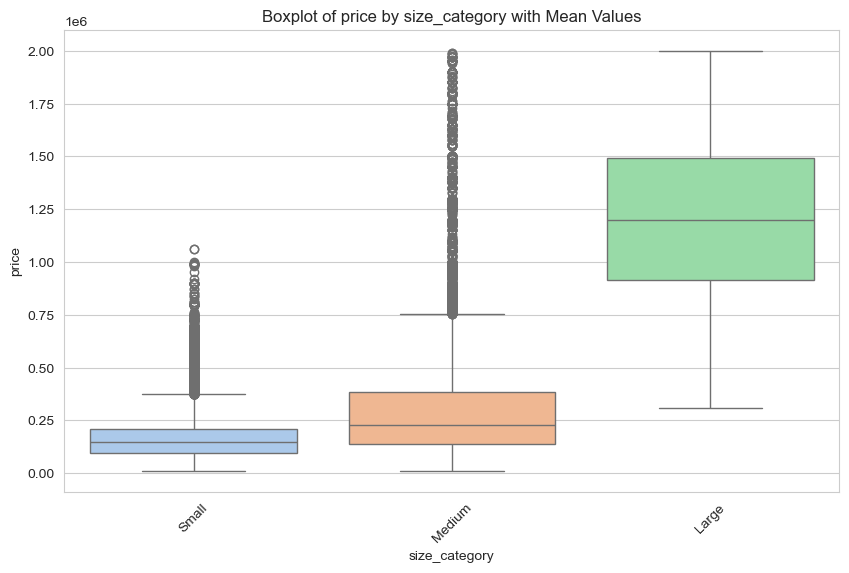

Summary Table of price by size_category sorted by Mean:
  size_category       mean        Q1         Q3   std_dev
0         Large 1226721.24 912368.00 1492500.00 395158.30
1        Medium  316382.02 139000.00  385000.00 286156.68
2         Small  168626.08  97000.00  208000.00 108063.69


In [58]:
bivariate_distribution(apartments_size_price, 'size_category', 'price')

In [59]:
# fintering prices by sizes categories
small_prices = apartments_size_price[apartments_size_price['size_category'] == 'Small']['price']
medium_prices = apartments_size_price[apartments_size_price['size_category'] == 'Medium']['price']
large_prices = apartments_size_price[apartments_size_price['size_category'] == 'Large']['price']

#### ANOVA test

In [60]:
f_stat, p_value = f_oneway(small_prices, medium_prices, large_prices)
print("F stats:", f_stat)
print("p value:", p_value)

F stats: 7078.257931641843
p value: 0.0


The ANOVA test confirms that the size of the apartment has a significant impact on its average price. This validates the initial observation from the EDA regarding price variations based on apartment size.

### Relationship Between Price and Property Condition

Evaluate whether property condition (new, resale, or fixer-upper) has a significant impact on price.

**Hypotheses**
- **H₀ (Null Hypothesis):** The condition of the property (new, resale, or fixer-upper) does not significantly impact its price.
- **H₁ (Alternative Hypothesis):** The condition of the property (new, resale, or fixer-upper) has a significant impact on its price.

**Justification**
During the EDA, it was observed that property condition seemed to influence prices, with new properties typically being more expensive and fixer-uppers the least expensive. This test will determine if these observed differences are statistically significant.

**Statistical Test**
- **ANOVA (Analysis of Variance):** As the property condition includes three categories, ANOVA is appropriate to test whether there are significant differences in mean prices between these groups.

In [61]:
# filter data
apartments_condition_price = apartments[['price', 'condition']]
apartments_condition_price['condition'].value_counts()

condition
Resale         42387
Fixer-upper     4199
New             1930
Name: count, dtype: int64

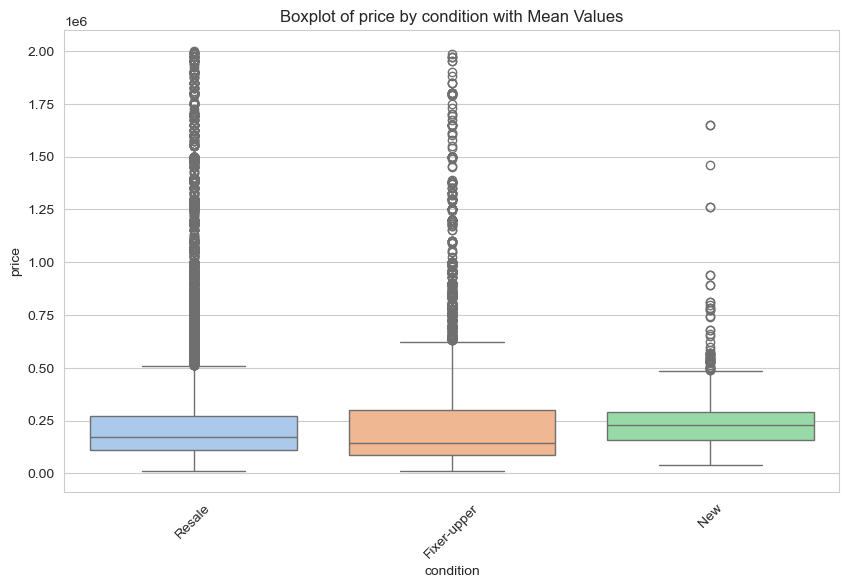

Summary Table of price by condition sorted by Mean:
     condition      mean        Q1        Q3   std_dev
0  Fixer-upper 258840.81  85000.00 300000.00 299349.24
1          New 236570.85 157350.00 290000.00 133724.22
2       Resale 236435.61 110000.00 270000.00 229661.57


In [62]:
bivariate_distribution(apartments_condition_price, 'condition', 'price')

In [63]:
# group data by condition
new_prices = apartments_condition_price[apartments_condition_price['condition'] == 'New']['price']
resale_prices = apartments_condition_price[apartments_condition_price['condition'] == 'Resale']['price']
fixer_prices = apartments_condition_price[apartments_condition_price['condition'] == 'Fixer-upper']['price']

#### ANOVA Test

In [64]:
f_stat, p_value = f_oneway(new_prices, resale_prices, fixer_prices)
print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 17.639921096679686
p-value: 2.1971710152203248e-08


The ANOVA test confirms that property condition is a significant factor in determining price differences. This provides statistical validation for the patterns observed during the exploratory analysis.

### Relationship Between Number of Bathrooms and Price

Evaluate whether the number of bathrooms has a significant relationship with property prices.

**Hypotheses**
- **H₀ (Null Hypothesis):** There is no significant correlation between the number of bathrooms and the price.
- **H₁ (Alternative Hypothesis):** There is a significant correlation between the number of bathrooms and the price.

**Justification**
The EDA suggested that the number of bathrooms might influence the price, particularly in Medium and Large segments. This test will validate if this observation holds statistically.

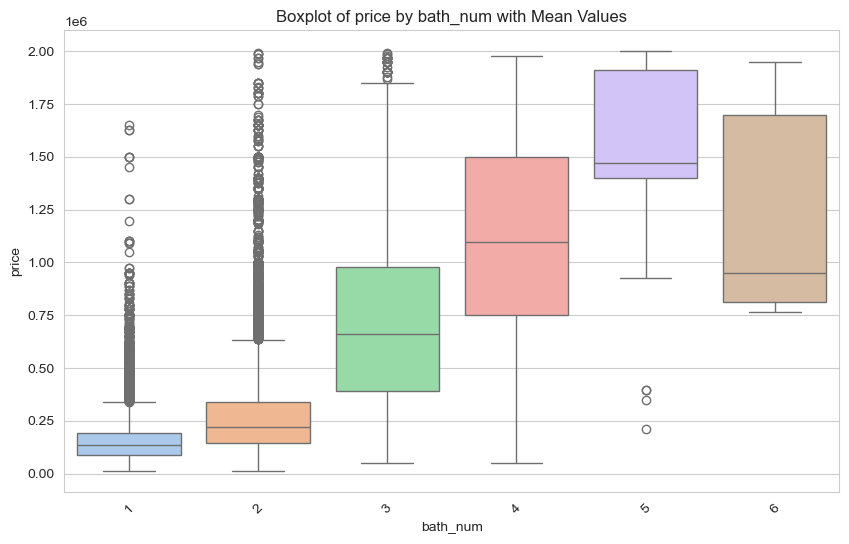

Summary Table of price by bath_num sorted by Mean:
   bath_num       mean         Q1         Q3   std_dev
0         5 1462586.21 1400000.00 1910000.00 545917.15
1         6 1222090.67  812204.00 1700000.00 569791.54
2         4 1106138.37  750000.00 1499500.00 521003.16
3         3  739187.24  391462.00  980000.00 455761.47
4         2  282015.13  143450.00  340000.00 227024.93
5         1  157139.33   89500.00  190000.00 106947.47


In [65]:
apartments_bath_price = apartments[['bath_num', 'price']]
bivariate_distribution(apartments_bath_price, 'bath_num', 'price')

#### Pearson Correlation Test

In [66]:
corr, p_value = pearsonr(apartments_bath_price['bath_num'], apartments_bath_price['price'])
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.4950310584865552
P-value: 0.0


The correlation is moderate (0.49) and the p-value is below the typical threshold of (0.05), indicating that the relationship is statistically significant. This confirms that the number of bathrooms influences property prices. It supports the observations made during the EDA, particularly for the Medium and Large segments. However, the correlation is not strong enough to consider the number of bathrooms as the sole determining factor.

### Geographic Impact on Prices

Assess how variables such as latitude, longitude, and region significantly influence property prices.

In [67]:
# preparing data
geo_price_data = apartments[['price', 'latitude', 'longitude', 'region']]
geo_price_data = pd.get_dummies(geo_price_data, columns=['region'], drop_first=True)

In [68]:
# fix problem with bool variables
geo_price_data = geo_price_data.astype({col: 'int' for col in geo_price_data.columns if geo_price_data[col].dtype == 'bool'})
# Verifiying
print(geo_price_data.dtypes)

price                          float64
latitude                       float64
longitude                      float64
region_Canarias                  int32
region_Castilla y León           int32
region_Castilla-La Mancha        int32
region_Cataluña                  int32
region_Comunidad Valenciana      int32
region_Comunidad de Madrid       int32
region_Galicia                   int32
region_Islas Baleares            int32
region_País Vasco                int32
dtype: object


In [69]:
# Independent and dependent variable
X = geo_price_data.drop(columns=['price'])
y = geo_price_data['price']
X = sm.add_constant(X)

#### Linear Regression Model

In [70]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     1051.
Date:                Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                        09:13:06   Log-Likelihood:            -6.6338e+05
No. Observations:               48516   AIC:                         1.327e+06
Df Residuals:                   48504   BIC:                         1.327e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#### Results

- **R-squared**: The model explains 19.3% of the variability in property prices, indicating that location has a moderate impact on prices.

- **Significant Coefficients**:
   - **Latitude**: With a coefficient of 94,190, it indicates that for each additional degree of latitude (north), the price increases by an average of 94,190 monetary units.
   - **Region Canarias**: Increases the price by an average of 861,500 units, making it the region with the highest positive impact.
   - **Region Castilla y León**: Average reduction of 398,900 units.
   - **Region Castilla-La Mancha**: Average reduction of 174,600 units.
   - **Region Cataluña**: Average reduction of 447,200 units.
   - **Region Galicia**: Average reduction of 529,200 units.
   - **País Vasco**: Average reduction of 420,500 units.
   - **Islas Baleares**: Although it has a positive coefficient (16,370), it is not statistically significant (p > 0.05).

- **Non-Significant Variables**:
   - **Longitude**: Does not show a statistically significant impact on prices (p = 0.086).
   - **Islas Baleares**: Although it is a standout region in previous analyses, the model does not find a significant relationship after adjusting for other variables.

- **Multicollinearity**: The high "condition number" suggests possible multicollinearity issues, meaning some independent variables are correlated, which could affect the stability of the coefficients.

- **Residual Distribution**: The high Omnibus test value and Jarque-Bera statistic indicate that residuals are not normally distributed, which may limit the interpretation of results.

**Conclusion**:

The model demonstrates that geographic location, represented by latitude and certain regions, has a significant impact on property prices. However, the model highlights that other factors not included explain most of the variability in prices. This aligns with previous EDA observations, emphasizing the need to incorporate additional variables for a more comprehensive understanding.

## Tableau Dashboard

The project is presented through an interactive dashboard in Tableau, designed to provide a clear and understandable visualization of the analyzed data. This dashboard allows users to explore information dynamically, combining different charts, tables, and filters that facilitate the interpretation of results.

Each section of the dashboard is organized to highlight the most relevant insights, enabling users to identify trends, patterns, and key relationships in the data intuitively. In addition, interactive filters and segmentation options allow for a deeper analysis of specific areas, adapting to different visualization and decision-making needs.

Thanks to this visual and dynamic approach, the dashboard not only presents the project results in a structured way but also facilitates effective communication of the findings to any audience, regardless of their technical background.

You can find it in the project folder.